In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from torchvision import datasets, transforms
from IPython.display import HTML, display
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🧠 CNN Internals: Understanding Convolution Step by Step")
print("=" * 60)

🧠 CNN Internals: Understanding Convolution Step by Step



EXAMPLE 1: Basic 1D Convolution

📊 Simple Edge Detection (1D)
----------------------------------------


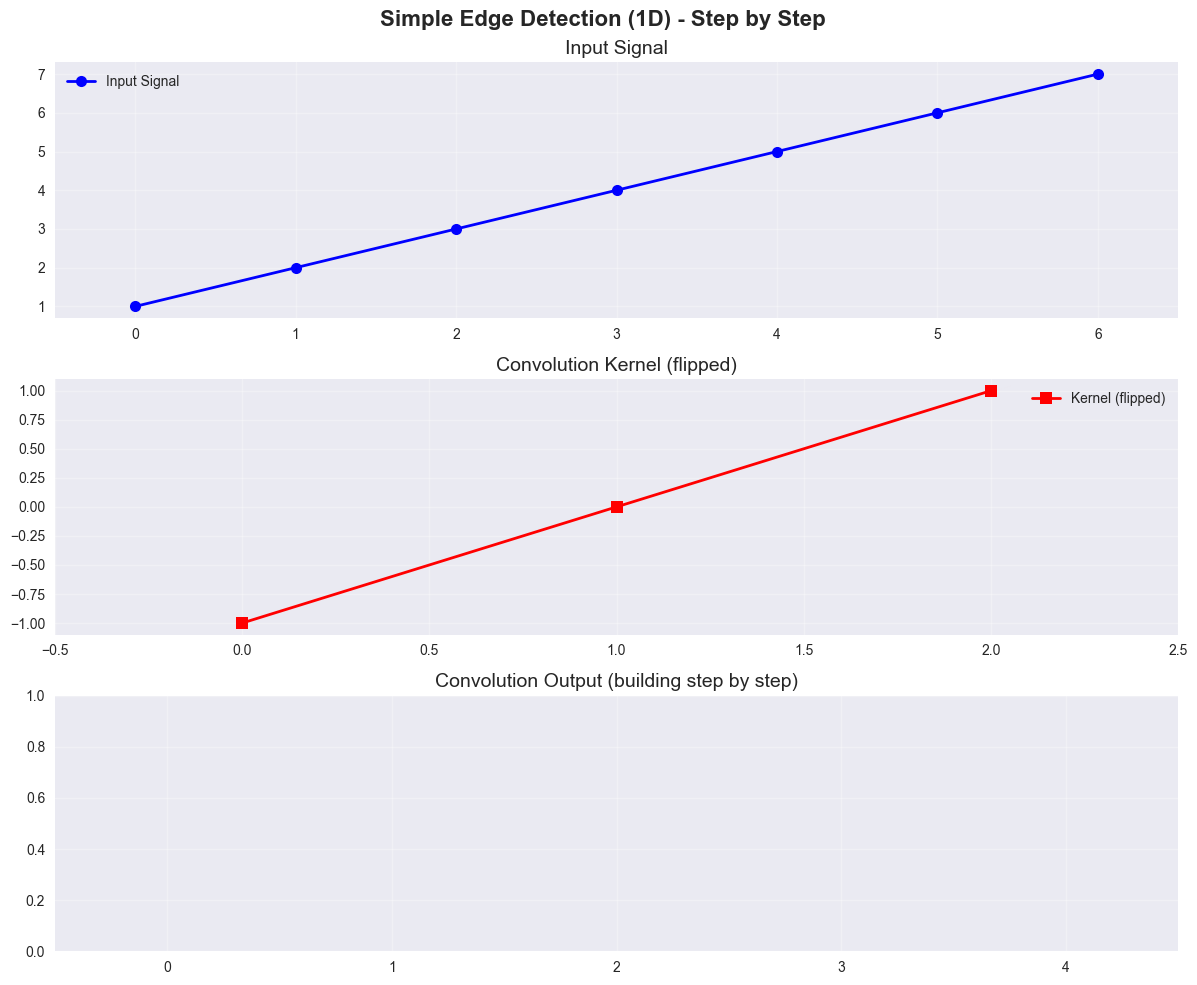

Step-by-step convolution calculation:
Formula: output[i] = Σ(signal[i+j] * kernel_flipped[j])

Position 0: (1.0 × -1.0) + (2.0 × 0.0) + (3.0 × 1.0) = 2.00


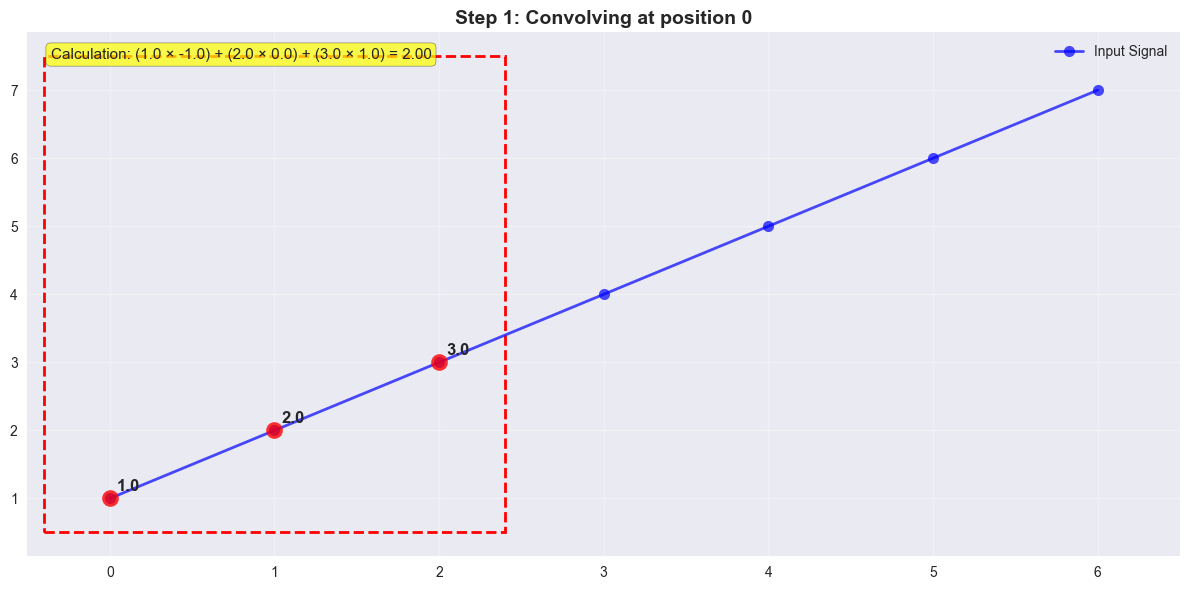

Position 1: (2.0 × -1.0) + (3.0 × 0.0) + (4.0 × 1.0) = 2.00


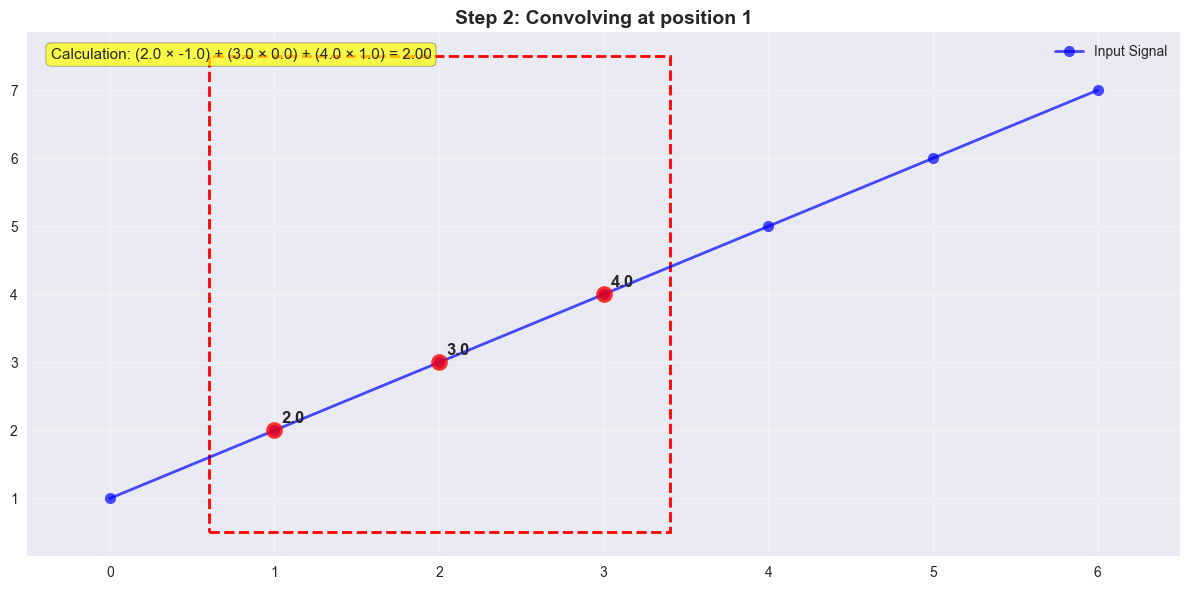

Position 2: (3.0 × -1.0) + (4.0 × 0.0) + (5.0 × 1.0) = 2.00


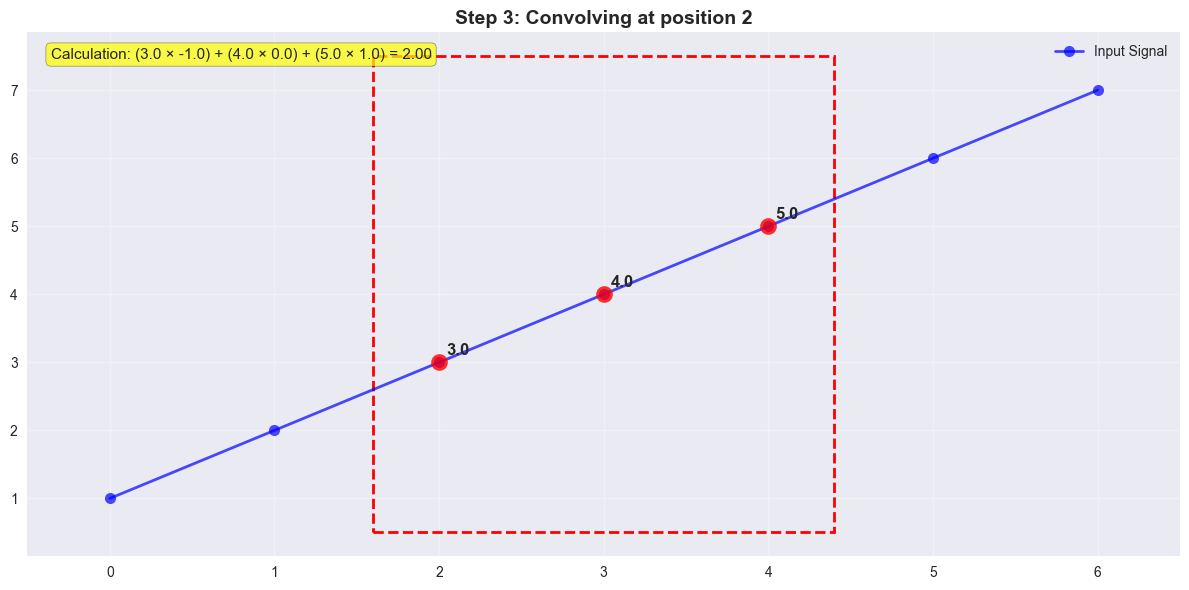

Position 3: (4.0 × -1.0) + (5.0 × 0.0) + (6.0 × 1.0) = 2.00


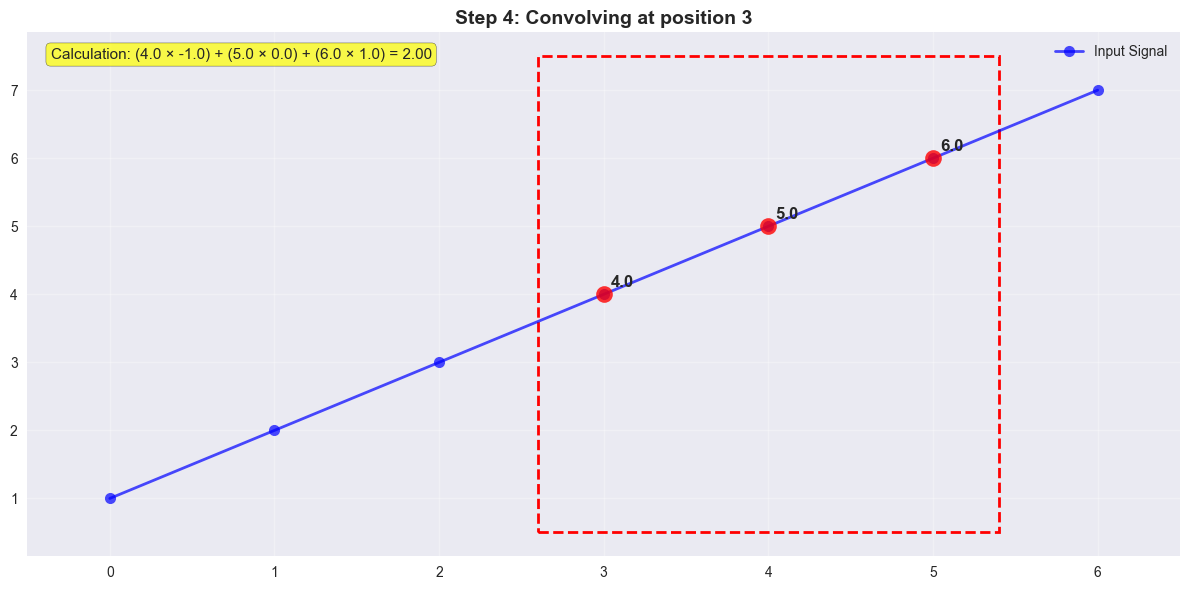

Position 4: (5.0 × -1.0) + (6.0 × 0.0) + (7.0 × 1.0) = 2.00


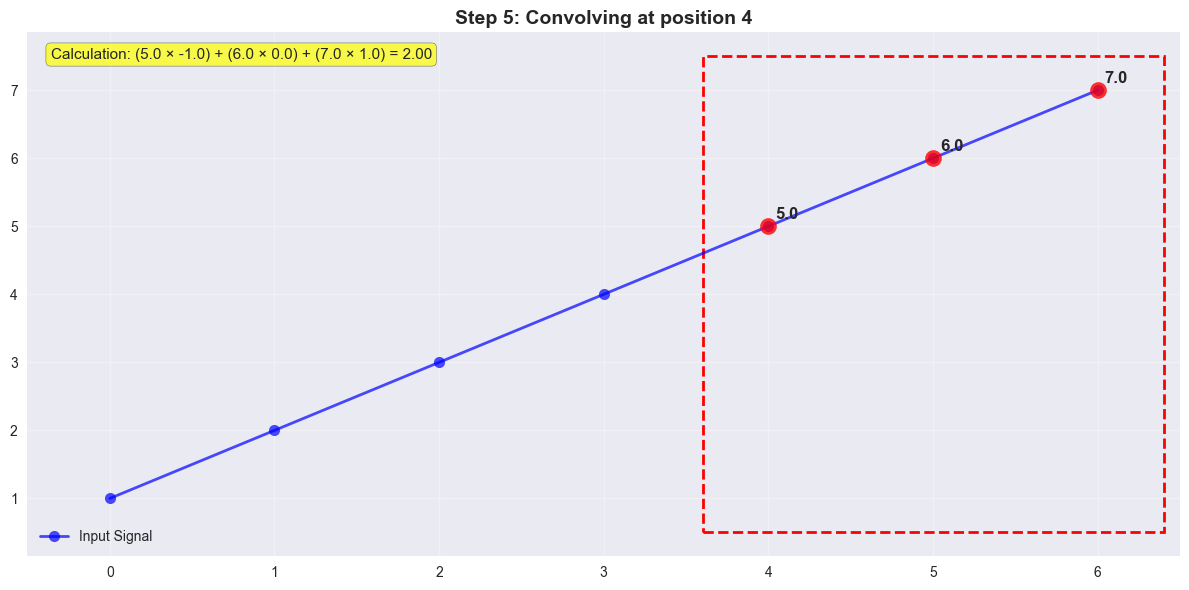


Final convolution result: [2. 2. 2. 2. 2.]
PyTorch result:          [-2. -2. -2. -2. -2.]
Difference:              [4. 4. 4. 4. 4.]


In [2]:
# ============================================================================
# PART 1: 1D CONVOLUTION - THE FOUNDATION
# ============================================================================

def visualize_1d_convolution_step_by_step(signal, kernel, title="1D Convolution"):
    """
    Visualize 1D convolution operation step by step with animated sliding window
    """
    print(f"\n📊 {title}")
    print("-" * 40)
    
    # Manual convolution calculation for visualization
    signal_len = len(signal)
    kernel_len = len(kernel)
    output_len = signal_len - kernel_len + 1
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 10))
    fig.suptitle(f'{title} - Step by Step', fontsize=16, fontweight='bold')
    
    # Plot original signal
    axes[0].plot(signal, 'b-o', linewidth=2, markersize=8, label='Input Signal')
    axes[0].set_title('Input Signal', fontsize=14)
    axes[0].grid(True, alpha=0.3)
    axes[0].legend()
    axes[0].set_xlim(-0.5, len(signal) - 0.5)
    
    # Plot kernel (flipped for convolution)
    kernel_flipped = np.flip(kernel)
    axes[1].plot(kernel_flipped, 'r-s', linewidth=2, markersize=8, label='Kernel (flipped)')
    axes[1].set_title('Convolution Kernel (flipped)', fontsize=14)
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    axes[1].set_xlim(-0.5, len(kernel) - 0.5)
    
    # Initialize output plot
    output = np.zeros(output_len)
    axes[2].set_title('Convolution Output (building step by step)', fontsize=14)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_xlim(-0.5, output_len - 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Step-by-step convolution
    print("Step-by-step convolution calculation:")
    print("Formula: output[i] = Σ(signal[i+j] * kernel_flipped[j])")
    print()
    
    for i in range(output_len):
        # Calculate convolution at position i
        conv_sum = 0
        calculation_str = ""
        
        for j in range(kernel_len):
            signal_val = signal[i + j]
            kernel_val = kernel_flipped[j]
            product = signal_val * kernel_val
            conv_sum += product
            
            if j > 0:
                calculation_str += " + "
            calculation_str += f"({signal_val:.1f} × {kernel_val:.1f})"
        
        output[i] = conv_sum
        
        print(f"Position {i}: {calculation_str} = {conv_sum:.2f}")
        
        # Create visualization for this step
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        
        # Plot signal with highlighted region
        ax.plot(range(len(signal)), signal, 'b-o', linewidth=2, markersize=8, alpha=0.7, label='Input Signal')
        
        # Highlight the region being convolved
        for j in range(kernel_len):
            ax.plot(i + j, signal[i + j], 'ro', markersize=12, alpha=0.8)
            ax.annotate(f'{signal[i + j]:.1f}', (i + j, signal[i + j]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=12, fontweight='bold')
        
        # Add rectangle to show the convolution window
        rect = Rectangle((i - 0.4, min(signal) - 0.5), kernel_len - 0.2, 
                        max(signal) - min(signal) + 1, 
                        fill=False, edgecolor='red', linewidth=2, linestyle='--')
        ax.add_patch(rect)
        
        ax.set_title(f'Step {i + 1}: Convolving at position {i}', fontsize=14, fontweight='bold')
        ax.text(0.02, 0.95, f'Calculation: {calculation_str} = {conv_sum:.2f}', 
                transform=ax.transAxes, fontsize=11, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.set_xlim(-0.5, len(signal) - 0.5)
        
        plt.tight_layout()
        plt.show()
    
    # Final result
    print(f"\nFinal convolution result: {output}")
    
    # Compare with PyTorch
    signal_tensor = torch.tensor(signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    pytorch_result = F.conv1d(signal_tensor, kernel_tensor).squeeze().detach().numpy()
    
    print(f"PyTorch result:          {pytorch_result}")
    print(f"Difference:              {np.abs(output - pytorch_result)}")
    
    return output

# Example 1: Simple 1D signals
print("\n" + "="*60)
print("EXAMPLE 1: Basic 1D Convolution")
print("="*60)

# Create a simple signal and kernel
simple_signal = np.array([1, 2, 3, 4, 5, 6, 7])
simple_kernel = np.array([1, 0, -1])  # Edge detection kernel

result1 = visualize_1d_convolution_step_by_step(simple_signal, simple_kernel, 
                                               "Simple Edge Detection (1D)")


PART 2: Different 1D Kernels and Their Effects
Edge Detection kernel: [-1  0  1]
  Effect: Applied to noisy sine wave

Blur (Box) kernel: [0.33333333 0.33333333 0.33333333]
  Effect: Applied to noisy sine wave

Sharpen kernel: [-1  3 -1]
  Effect: Applied to noisy sine wave

Gaussian Blur kernel: [0.25 0.5  0.25]
  Effect: Applied to noisy sine wave



IndexError: index 3 is out of bounds for axis 0 with size 3

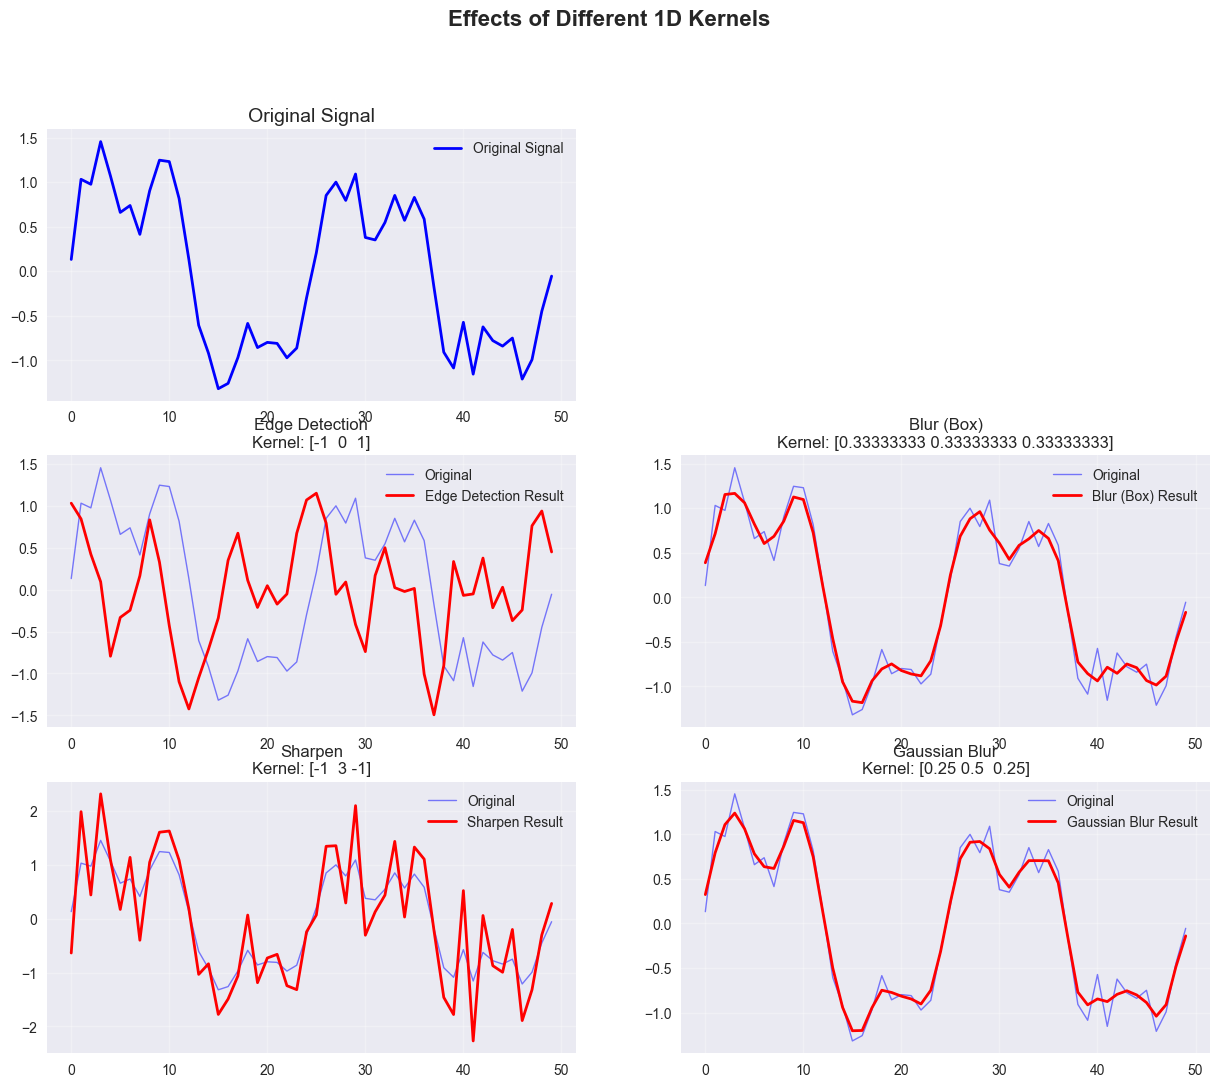

In [3]:
def demonstrate_1d_kernels():
    """
    Show different 1D kernels and their effects on signals
    """
    print("\n" + "="*60)
    print("PART 2: Different 1D Kernels and Their Effects")
    print("="*60)
    
    # Create a more interesting signal
    x = np.linspace(0, 4*np.pi, 50)
    signal = np.sin(x) + 0.5*np.sin(3*x) + 0.2*np.random.randn(50)
    
    # Define different kernels
    kernels = {
        'Edge Detection': np.array([-1, 0, 1]),
        'Blur (Box)': np.array([1, 1, 1]) / 3,
        'Sharpen': np.array([-1, 3, -1]),
        'Gaussian Blur': np.array([1, 2, 1]) / 4,
        'High Pass': np.array([-1, 2, -1]),
    }
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle('Effects of Different 1D Kernels', fontsize=16, fontweight='bold')
    
    # Plot original signal
    axes[0, 0].plot(signal, 'b-', linewidth=2, label='Original Signal')
    axes[0, 0].set_title('Original Signal', fontsize=14)
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    
    # Remove the empty subplot
    axes[0, 1].remove()
    
    # Apply each kernel
    for idx, (name, kernel) in enumerate(kernels.items()):
        row = (idx + 2) // 2
        col = (idx + 2) % 2
        
        # Convert to PyTorch and apply convolution
        signal_tensor = torch.tensor(signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        result = F.conv1d(signal_tensor, kernel_tensor, padding=len(kernel)//2).squeeze().detach().numpy()
        
        axes[row, col].plot(signal, 'b-', alpha=0.5, linewidth=1, label='Original')
        axes[row, col].plot(result, 'r-', linewidth=2, label=f'{name} Result')
        axes[row, col].set_title(f'{name}\nKernel: {kernel}', fontsize=12)
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].legend()
        
        print(f"{name} kernel: {kernel}")
        print(f"  Effect: Applied to noisy sine wave")
        print()
    
    plt.tight_layout()
    plt.show()

demonstrate_1d_kernels()

In [4]:
# ============================================================================
# PART 3: 2D CONVOLUTION ON IMAGES
# ============================================================================

def load_mnist_sample():
    """
    Load a sample MNIST digit for 2D convolution demonstration
    """
    print("\n" + "="*60)
    print("PART 3: 2D Convolution on Images (MNIST)")
    print("="*60)
    
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    
    # Get a sample digit
    sample_image, label = mnist_dataset[0]  # First image
    image_array = sample_image.squeeze().numpy()
    
    print(f"Sample digit: {label}")
    print(f"Image shape: {image_array.shape}")
    print(f"Pixel value range: [{image_array.min():.3f}, {image_array.max():.3f}]")
    
    return image_array, label

def visualize_2d_convolution_step_by_step(image, kernel, stride=1, title="2D Convolution"):
    """
    Visualize 2D convolution with step-by-step animation
    """
    print(f"\n📊 {title}")
    print("-" * 40)
    
    # Get dimensions
    img_h, img_w = image.shape
    ker_h, ker_w = kernel.shape
    
    # Calculate output dimensions
    out_h = (img_h - ker_h) // stride + 1
    out_w = (img_w - ker_w) // stride + 1
    
    print(f"Input image: {img_h}×{img_w}")
    print(f"Kernel: {ker_h}×{ker_w}")
    print(f"Stride: {stride}")
    print(f"Output: {out_h}×{out_w}")
    
    # Create output array
    output = np.zeros((out_h, out_w))
    
    # Create figure for step-by-step visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'{title} - Step by Step Process', fontsize=16, fontweight='bold')
    
    # Plot original image
    im1 = axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=14)
    axes[0, 0].grid(True, alpha=0.3)
    plt.colorbar(im1, ax=axes[0, 0])
    
    # Plot kernel
    im2 = axes[0, 1].imshow(kernel, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[0, 1].set_title('Convolution Kernel', fontsize=14)
    for i in range(ker_h):
        for j in range(ker_w):
            axes[0, 1].text(j, i, f'{kernel[i, j]:.1f}', 
                           ha='center', va='center', fontsize=12, fontweight='bold')
    plt.colorbar(im2, ax=axes[0, 1])
    
    # Initialize output plot
    im3 = axes[0, 2].imshow(output, cmap='gray')
    axes[0, 2].set_title('Output (Final Result)', fontsize=14)
    plt.colorbar(im3, ax=axes[0, 2])
    
    # Show few example positions
    example_positions = [(0, 0), (out_h//4, out_w//4), (out_h//2, out_w//2), (3*out_h//4, 3*out_w//4)]
    
    for idx, (i, j) in enumerate(example_positions):
        if i >= out_h or j >= out_w:
            continue
            
        # Extract the region
        region = image[i*stride:i*stride+ker_h, j*stride:j*stride+ker_w]
        
        # Calculate convolution
        conv_result = np.sum(region * kernel)
        output[i, j] = conv_result
        
        # Visualize this step
        row = 1
        col = idx if idx < 2 else idx - 2
        if idx >= 2:
            # Create additional subplots if needed
            if idx == 2:
                fig.add_subplot(2, 4, 7)
                fig.add_subplot(2, 4, 8)
            axes = fig.get_axes()
        
        ax = axes[6 + idx] if idx >= 2 else axes[row, col]
        
        # Show the region being convolved
        highlighted_image = image.copy()
        highlighted_image[i*stride:i*stride+ker_h, j*stride:j*stride+ker_w] += 0.3
        
        im = ax.imshow(highlighted_image, cmap='gray')
        
        # Add rectangle to show the convolution window
        rect = Rectangle((j*stride - 0.5, i*stride - 0.5), ker_w, ker_h, 
                        fill=False, edgecolor='red', linewidth=3)
        ax.add_patch(rect)
        
        ax.set_title(f'Position ({i},{j}): {conv_result:.2f}', fontsize=12)
        
        print(f"Position ({i},{j}):")
        print(f"  Region shape: {region.shape}")
        print(f"  Convolution result: {conv_result:.4f}")
        print(f"  Region × Kernel:")
        print(f"  {region}")
        print(f"  ×")
        print(f"  {kernel}")
        print(f"  = {conv_result:.4f}")
        print()
    
    plt.tight_layout()
    plt.show()
    
    # Compute full convolution using nested loops (for educational purposes)
    print("Computing full convolution...")
    for i in range(out_h):
        for j in range(out_w):
            region = image[i*stride:i*stride+ker_h, j*stride:j*stride+ker_w]
            output[i, j] = np.sum(region * kernel)
    
    # Compare with PyTorch
    print("\nComparing with PyTorch implementation:")
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    pytorch_result = F.conv2d(image_tensor, kernel_tensor, stride=stride).squeeze().detach().numpy()
    
    print(f"Manual result shape: {output.shape}")
    print(f"PyTorch result shape: {pytorch_result.shape}")
    print(f"Results match: {np.allclose(output, pytorch_result, atol=1e-6)}")
    
    # Final visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('2D Convolution: Input → Kernel → Output', fontsize=16, fontweight='bold')
    
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f'Input Image\n{image.shape}', fontsize=14)
    
    im_kernel = axes[1].imshow(kernel, cmap='RdBu_r', vmin=-1, vmax=1)
    axes[1].set_title(f'Kernel\n{kernel.shape}', fontsize=14)
    plt.colorbar(im_kernel, ax=axes[1])
    
    axes[2].imshow(output, cmap='gray')
    axes[2].set_title(f'Output\n{output.shape}', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return output

# Load MNIST sample
mnist_image, digit_label = load_mnist_sample()


PART 3: 2D Convolution on Images (MNIST)
Sample digit: 5
Image shape: (28, 28)
Pixel value range: [0.000, 1.000]



PART 4: Different 2D Kernels and Their Effects

Identity Kernel:
[[0 0 0]
 [0 1 0]
 [0 0 0]]
  Output range: [-0.000, 1.000]
  Output mean: 0.138
  Output std: 0.312

Edge Detection (Sobel X) Kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
  Output range: [-3.918, 3.718]
  Output mean: -0.000
  Output std: 0.866

Edge Detection (Sobel Y) Kernel:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
  Output range: [-3.969, 3.969]
  Output mean: 0.000
  Output std: 1.309

Blur (Box) Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
  Output range: [0.000, 0.971]
  Output mean: 0.138
  Output std: 0.253

Gaussian Blur Kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
  Output range: [0.000, 0.980]
  Output mean: 0.138
  Output std: 0.264

Sharpen Kernel:
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
  Output range: [-2.059, 2.761]
  Output mean: 0.138
  Output std: 0.646

Emboss Kernel:
[[-2 -1  0]
 [-1  1  1]
 [ 0  1 

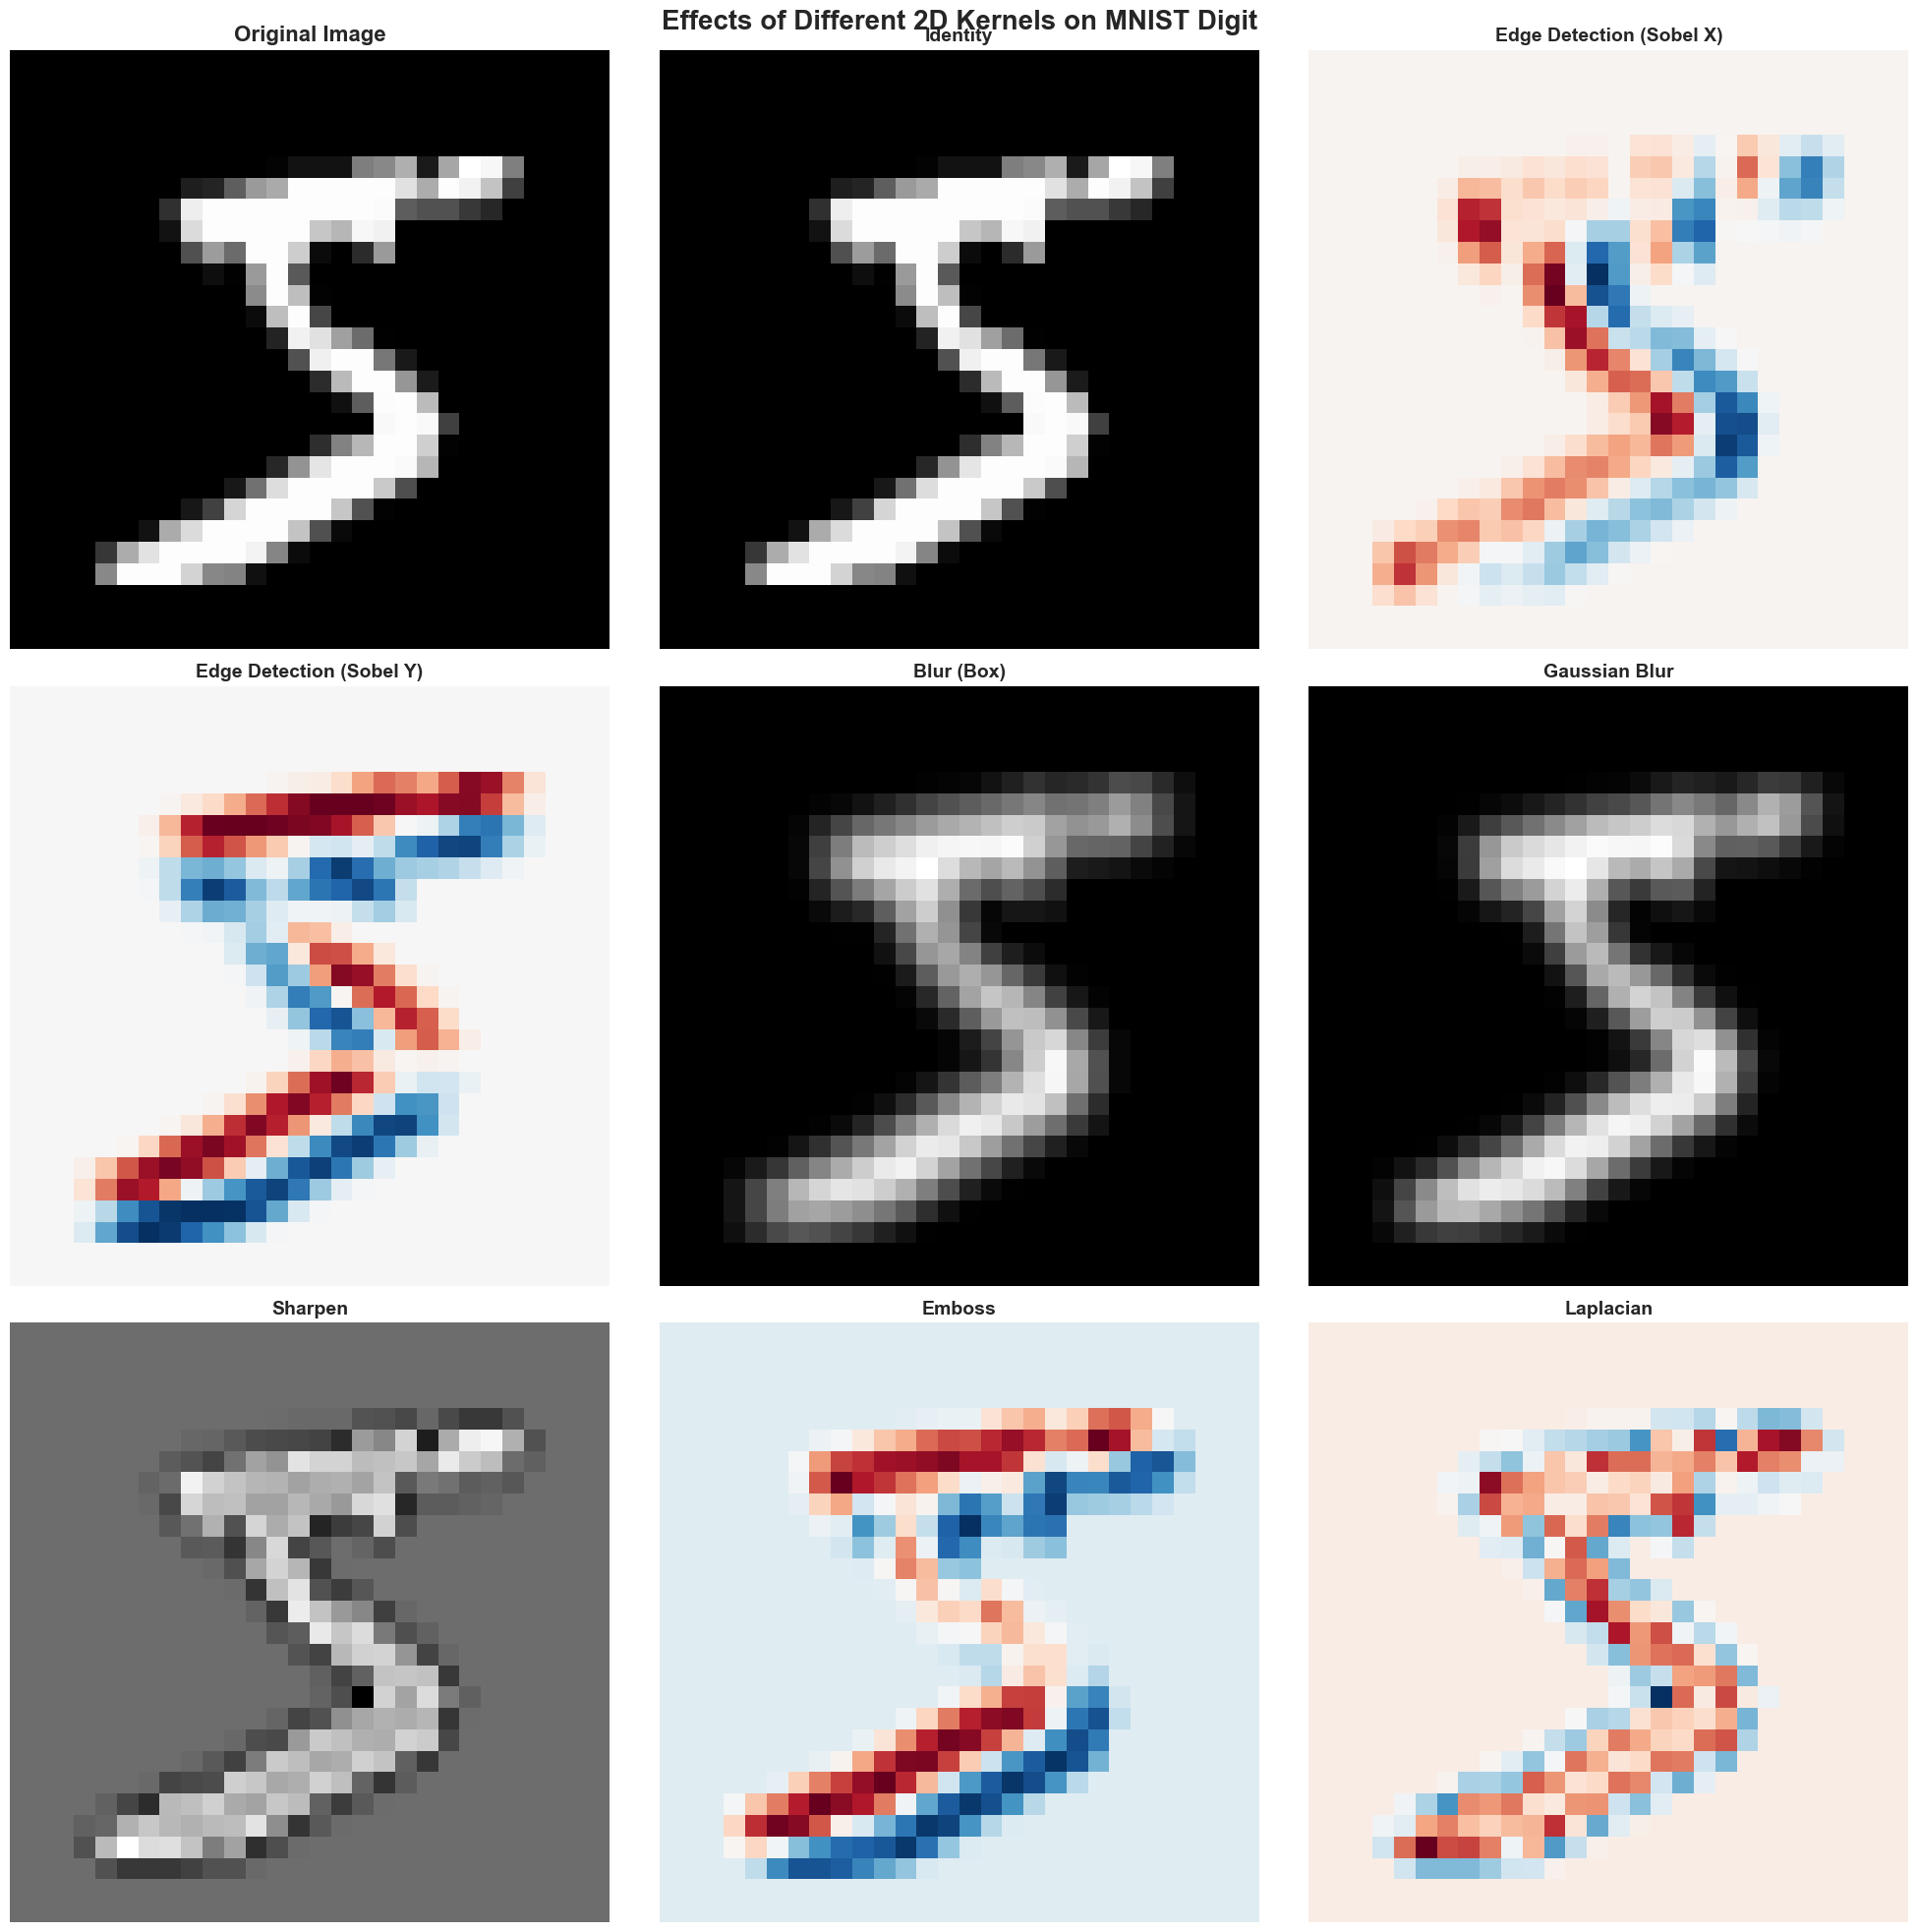


DETAILED EXAMPLE: Edge Detection Kernel

📊 Edge Detection on MNIST Region
----------------------------------------
Input image: 8×8
Kernel: 3×3
Stride: 1
Output: 6×6
Position (0,0):
  Region shape: (3, 3)
  Convolution result: 2.7255
  Region × Kernel:
  [[0.00392157 0.6039216  0.99215686]
 [0.         0.54509807 0.99215686]
 [0.         0.04313726 0.74509805]]
  ×
  [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
  = 2.7255

Position (1,1):
  Region shape: (3, 3)
  Convolution result: 2.0941
  Region × Kernel:
  [[0.54509807 0.99215686 0.74509805]
 [0.04313726 0.74509805 0.99215686]
 [0.         0.13725491 0.94509804]]
  ×
  [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
  = 2.0941

Position (3,3):
  Region shape: (3, 3)
  Convolution result: 1.0863
  Region × Kernel:
  [[0.94509804 0.88235295 0.627451  ]
 [0.31764707 0.9411765  0.99215686]
 [0.         0.1764706  0.7294118 ]]
  ×
  [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
  = 1.0863

Position (4,4):
  Region shape: (3, 3)
  Convolution result: 1.2314
  Regi

/var/folders/89/q_bd8b491yzg2dc4vj7smlqc0000gn/T/ipykernel_1694/3121673889.py:123: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


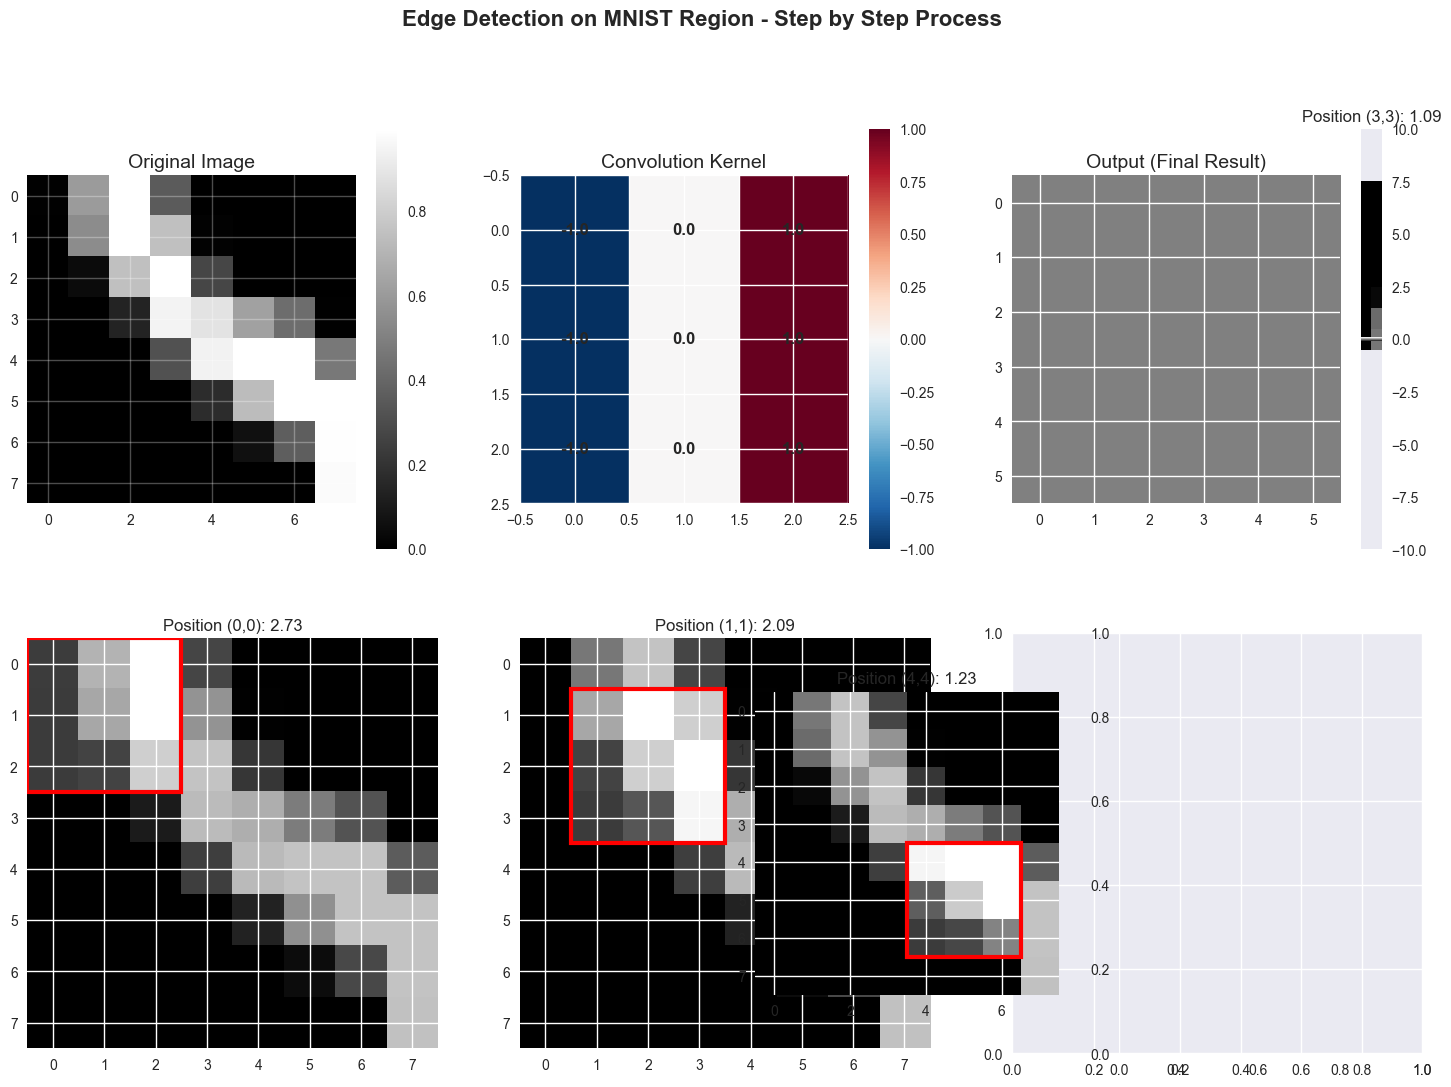

Computing full convolution...

Comparing with PyTorch implementation:
Manual result shape: (6, 6)
PyTorch result shape: (6, 6)
Results match: True


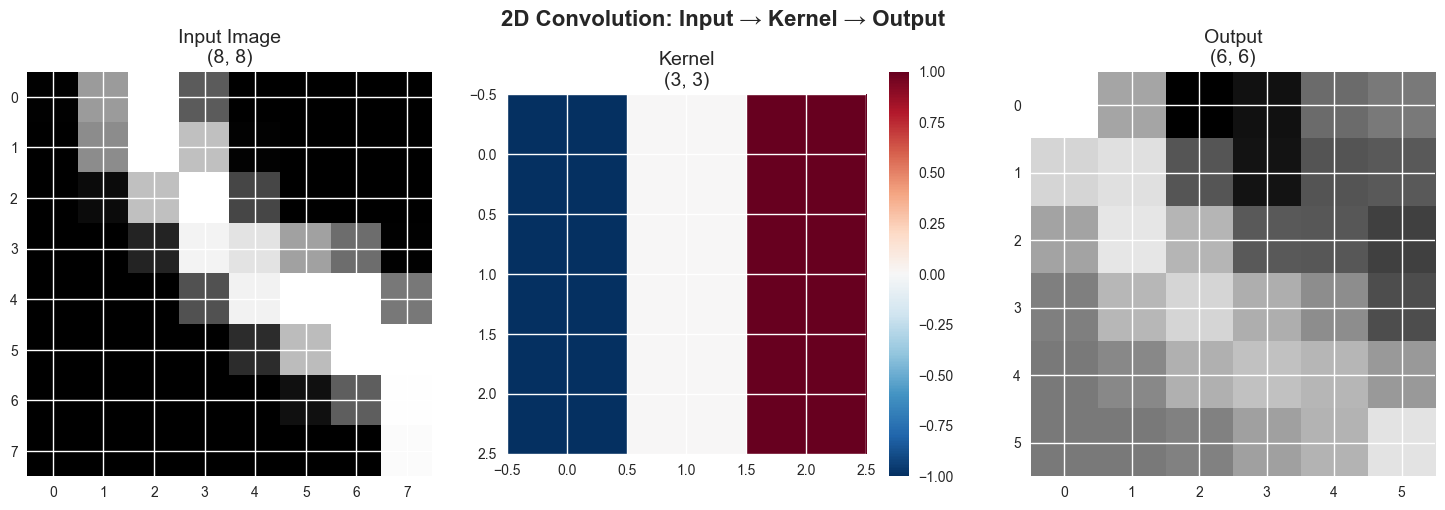

In [5]:
# ============================================================================
# PART 4: DIFFERENT 2D KERNELS AND THEIR EFFECTS
# ============================================================================

def demonstrate_2d_kernels(image):
    """
    Demonstrate various 2D kernels and their effects on images
    """
    print("\n" + "="*60)
    print("PART 4: Different 2D Kernels and Their Effects")
    print("="*60)
    
    # Define various 2D kernels
    kernels = {
        'Identity': np.array([[0, 0, 0],
                             [0, 1, 0],
                             [0, 0, 0]]),
        
        'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                             [-2, 0, 2],
                                             [-1, 0, 1]]),
        
        'Edge Detection (Sobel Y)': np.array([[-1, -2, -1],
                                             [ 0,  0,  0],
                                             [ 1,  2,  1]]),
        
        'Blur (Box)': np.ones((3, 3)) / 9,
        
        'Gaussian Blur': np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]]) / 16,
        
        'Sharpen': np.array([[ 0, -1,  0],
                            [-1,  5, -1],
                            [ 0, -1,  0]]),
        
        'Emboss': np.array([[-2, -1,  0],
                           [-1,  1,  1],
                           [ 0,  1,  2]]),
        
        'Laplacian': np.array([[ 0, -1,  0],
                              [-1,  4, -1],
                              [ 0, -1,  0]]),
    }
    
    # Create a grid to show all results
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    fig.suptitle('Effects of Different 2D Kernels on MNIST Digit', fontsize=20, fontweight='bold')
    
    # Show original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image', fontsize=16, fontweight='bold')
    axes[0, 0].axis('off')
    
    # Apply each kernel
    for idx, (name, kernel) in enumerate(kernels.items()):
        row = (idx + 1) // 3
        col = (idx + 1) % 3
        
        print(f"\n{name} Kernel:")
        print(kernel)
        
        # Apply convolution using PyTorch
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        result = F.conv2d(image_tensor, kernel_tensor, padding=1).squeeze().detach().numpy()
        
        # Display result
        if 'Edge' in name or 'Laplacian' in name or 'Emboss' in name:
            axes[row, col].imshow(result, cmap='RdBu_r')
        else:
            axes[row, col].imshow(result, cmap='gray')
        
        axes[row, col].set_title(f'{name}', fontsize=14, fontweight='bold')
        axes[row, col].axis('off')
        
        # Print some statistics
        print(f"  Output range: [{result.min():.3f}, {result.max():.3f}]")
        print(f"  Output mean: {result.mean():.3f}")
        print(f"  Output std: {result.std():.3f}")
    
    plt.tight_layout()
    plt.show()
    
    return kernels

# Demonstrate kernels
all_kernels = demonstrate_2d_kernels(mnist_image)

# Example: Step-by-step visualization with edge detection kernel
print("\n" + "="*60)
print("DETAILED EXAMPLE: Edge Detection Kernel")
print("="*60)

edge_kernel = np.array([[-1, 0, 1],
                       [-1, 0, 1], 
                       [-1, 0, 1]])

# Use a smaller region for detailed visualization
small_region = mnist_image[10:18, 10:18]  # 8x8 region
edge_result = visualize_2d_convolution_step_by_step(small_region, edge_kernel, 
                                                   title="Edge Detection on MNIST Region")


PART 5: Understanding Stride and Padding
Stride 1 (no padding): (28, 28) → (26, 26)
Stride 2 (no padding): (28, 28) → (13, 13)
Stride 3 (no padding): (28, 28) → (9, 9)
Padding 0 (stride=1): (28, 28) → (26, 26)
Padding 1 (stride=1): (28, 28) → (28, 28)
Padding 2 (stride=1): (28, 28) → (30, 30)
Padding 3 (stride=1): (28, 28) → (32, 32)


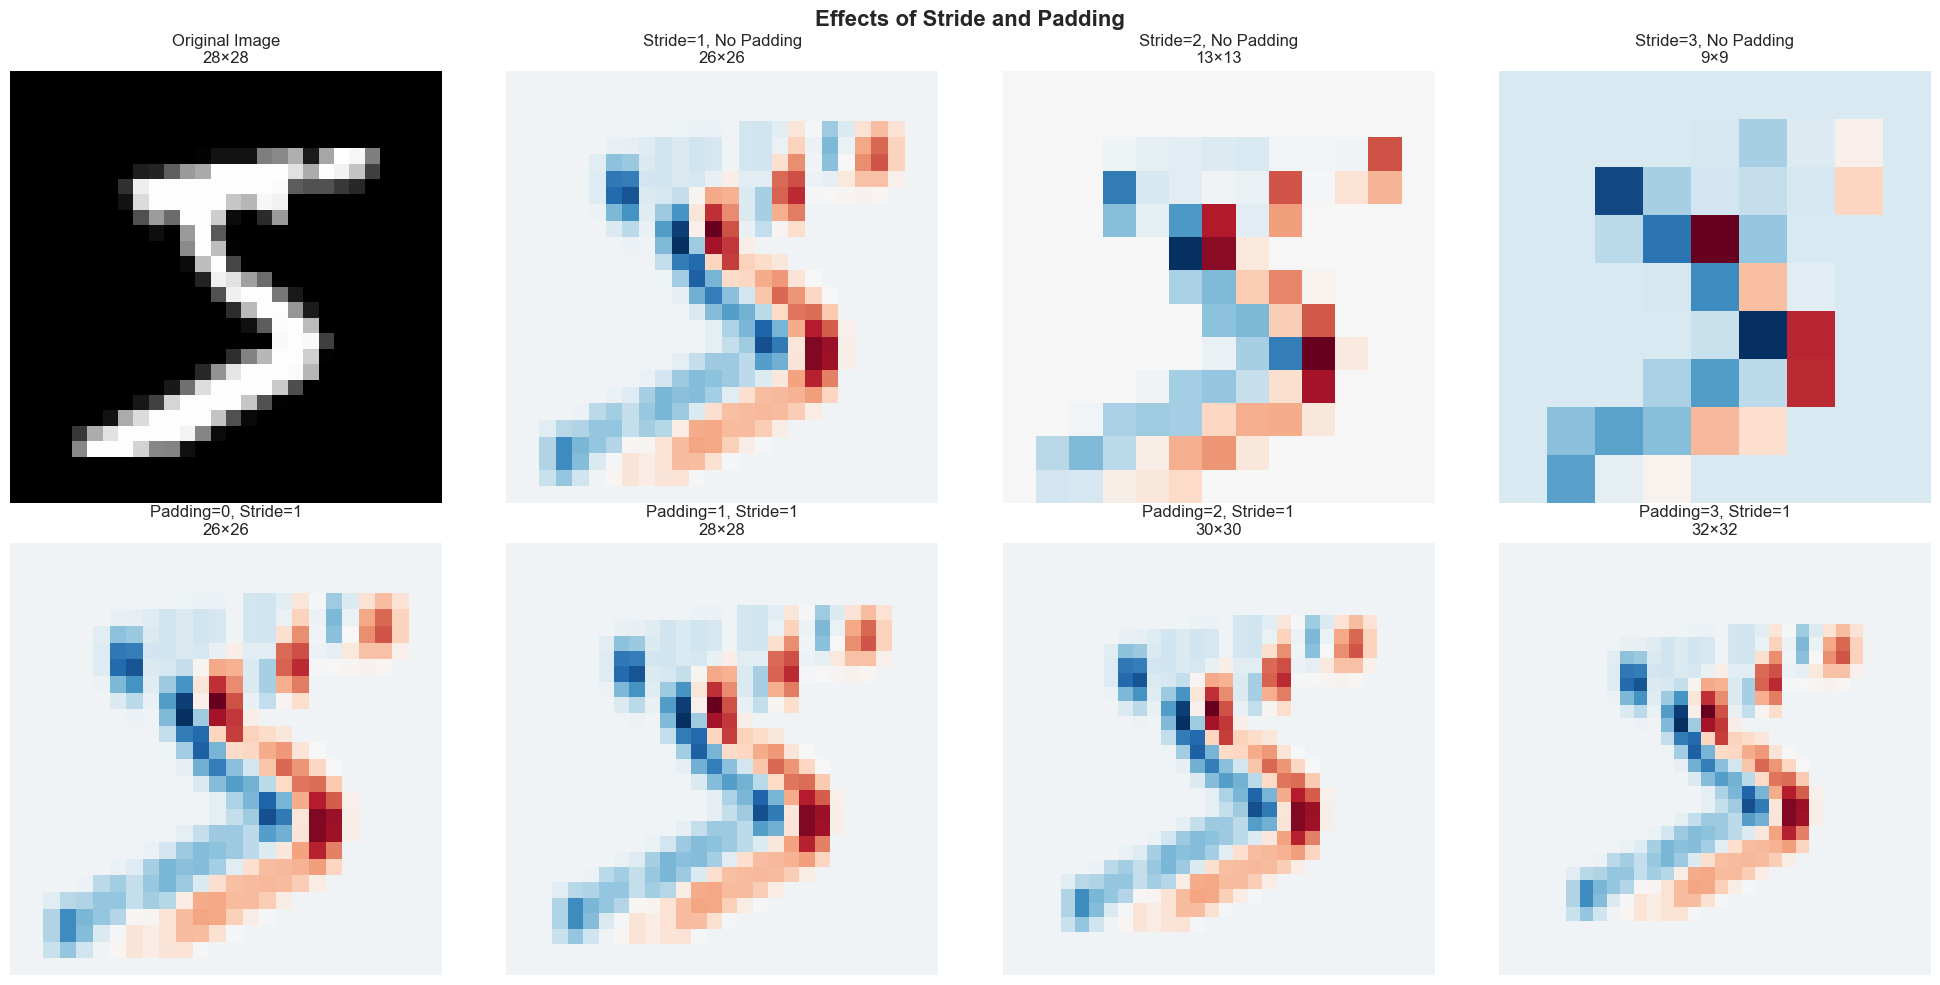


Mathematical relationships:
For 2D convolution:
  Output Height = (Input Height + 2×Padding - Kernel Height) / Stride + 1
  Output Width = (Input Width + 2×Padding - Kernel Width) / Stride + 1

Examples with our 28×28 image and 3×3 kernel:
  Stride=1, Padding=0: (28 + 2×0 - 3)/1 + 1 = 26×26
  Stride=1, Padding=1: (28 + 2×1 - 3)/1 + 1 = 28×28
  Stride=1, Padding=2: (28 + 2×2 - 3)/1 + 1 = 30×30
  Stride=2, Padding=0: (28 + 2×0 - 3)/2 + 1 = 13×13
  Stride=2, Padding=1: (28 + 2×1 - 3)/2 + 1 = 14×14
  Stride=2, Padding=2: (28 + 2×2 - 3)/2 + 1 = 15×15
  Stride=3, Padding=0: (28 + 2×0 - 3)/3 + 1 = 9×9
  Stride=3, Padding=1: (28 + 2×1 - 3)/3 + 1 = 10×10
  Stride=3, Padding=2: (28 + 2×2 - 3)/3 + 1 = 10×10


In [6]:
# ============================================================================
# PART 5: UNDERSTANDING STRIDE AND PADDING
# ============================================================================

def demonstrate_stride_and_padding(image):
    """
    Show the effects of different stride and padding values
    """
    print("\n" + "="*60)
    print("PART 5: Understanding Stride and Padding")
    print("="*60)
    
    kernel = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]]) / 3  # Vertical edge detection
    
    # Different stride values
    strides = [1, 2, 3]
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Effects of Stride and Padding', fontsize=16, fontweight='bold')
    
    # Original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image\n28×28', fontsize=12)
    axes[0, 0].axis('off')
    
    # Different strides (no padding)
    for i, stride in enumerate(strides):
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        result = F.conv2d(image_tensor, kernel_tensor, stride=stride).squeeze().detach().numpy()
        
        axes[0, i+1].imshow(result, cmap='RdBu_r')
        axes[0, i+1].set_title(f'Stride={stride}, No Padding\n{result.shape[0]}×{result.shape[1]}', fontsize=12)
        axes[0, i+1].axis('off')
        
        print(f"Stride {stride} (no padding): {image.shape} → {result.shape}")
    
    # Different padding values (stride=1)
    paddings = [0, 1, 2, 3]
    
    for i, padding in enumerate(paddings):
        image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        result = F.conv2d(image_tensor, kernel_tensor, padding=padding).squeeze().detach().numpy()
        
        axes[1, i].imshow(result, cmap='RdBu_r')
        axes[1, i].set_title(f'Padding={padding}, Stride=1\n{result.shape[0]}×{result.shape[1]}', fontsize=12)
        axes[1, i].axis('off')
        
        print(f"Padding {padding} (stride=1): {image.shape} → {result.shape}")
    
    plt.tight_layout()
    plt.show()
    
    # Mathematical explanation
    print("\nMathematical relationships:")
    print("For 2D convolution:")
    print("  Output Height = (Input Height + 2×Padding - Kernel Height) / Stride + 1")
    print("  Output Width = (Input Width + 2×Padding - Kernel Width) / Stride + 1")
    print()
    
    H, W = image.shape
    K = 3  # kernel size
    
    print("Examples with our 28×28 image and 3×3 kernel:")
    for s in [1, 2, 3]:
        for p in [0, 1, 2]:
            out_h = (H + 2*p - K) // s + 1
            out_w = (W + 2*p - K) // s + 1
            print(f"  Stride={s}, Padding={p}: ({H} + 2×{p} - {K})/{s} + 1 = {out_h}×{out_w}")

demonstrate_stride_and_padding(mnist_image)


PART 6: Multiple Channels and Feature Maps
Multi-channel image shape: (3, 28, 28)
Kernel 1 shape: (3, 3, 3)
Feature Map 1 shape: torch.Size([28, 28])
Kernel 2 shape: (3, 3, 3)
Feature Map 2 shape: torch.Size([28, 28])


/var/folders/89/q_bd8b491yzg2dc4vj7smlqc0000gn/T/ipykernel_1694/1934306820.py:98: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/89/q_bd8b491yzg2dc4vj7smlqc0000gn/T/ipykernel_1694/1934306820.py:98: UserWarning: Glyph 8859 (\N{CIRCLED ASTERISK OPERATOR}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/89/q_bd8b491yzg2dc4vj7smlqc0000gn/T/ipykernel_1694/1934306820.py:98: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/89/q_bd8b491yzg2dc4vj7smlqc0000gn/T/ipykernel_1694/1934306820.py:98: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/lexai/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lexai/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py

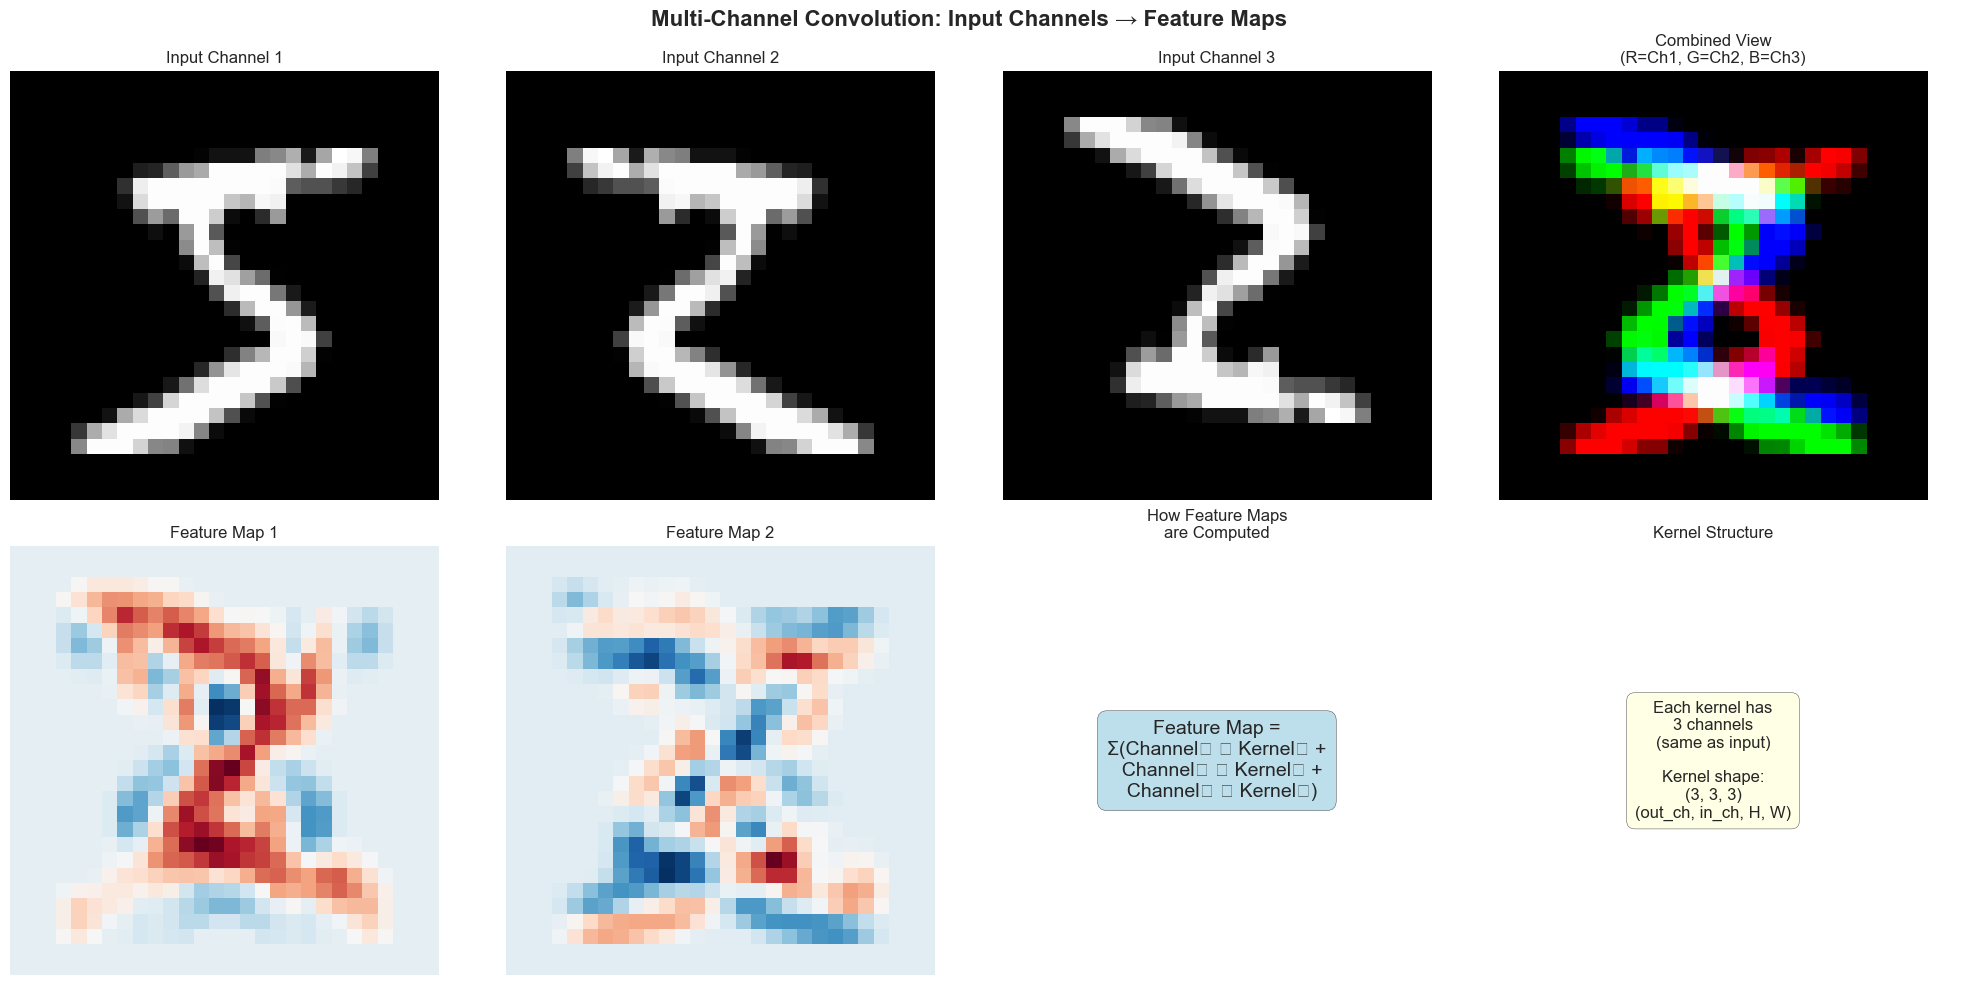


Key Concepts:
1. Each kernel must have the same number of channels as the input
2. Each kernel produces exactly one feature map
3. Feature map = sum of convolutions across all input channels
4. Multiple kernels = multiple feature maps


In [7]:
# ============================================================================
# PART 6: MULTIPLE CHANNELS AND FEATURE MAPS
# ============================================================================

def demonstrate_multiple_channels():
    """
    Show how convolution works with multiple input channels and produces multiple feature maps
    """
    print("\n" + "="*60)
    print("PART 6: Multiple Channels and Feature Maps")
    print("="*60)
    
    # Create a 3-channel "image" (like RGB)
    # We'll use the MNIST digit in 3 different transformations
    channel1 = mnist_image  # Original
    channel2 = np.fliplr(mnist_image)  # Horizontally flipped
    channel3 = np.flipud(mnist_image)  # Vertically flipped
    
    # Stack into 3-channel image
    multi_channel_image = np.stack([channel1, channel2, channel3], axis=0)
    print(f"Multi-channel image shape: {multi_channel_image.shape}")
    
    # Define multiple kernels (each will produce one feature map)
    kernels = [
        np.array([[[-1, 0, 1],    # Channel 1 kernel
                  [-1, 0, 1],
                  [-1, 0, 1]],
                 [[ 1, 0, -1],   # Channel 2 kernel  
                  [ 1, 0, -1],
                  [ 1, 0, -1]],
                 [[ 0, 1, 0],    # Channel 3 kernel
                  [ 1, 0, 1],
                  [ 0, 1, 0]]]),
        
        np.array([[[ 1, 2, 1],    # Another set of kernels
                  [ 0, 0, 0],
                  [-1, -2, -1]],
                 [[-1, -2, -1],
                  [ 0,  0,  0],
                  [ 1,  2,  1]],
                 [[ 1, 0, -1],
                  [ 2, 0, -2],
                  [ 1, 0, -1]]])
    ]
    
    # Visualize input channels
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle('Multi-Channel Convolution: Input Channels → Feature Maps', fontsize=16, fontweight='bold')
    
    # Show input channels
    for i in range(3):
        axes[0, i].imshow(multi_channel_image[i], cmap='gray')
        axes[0, i].set_title(f'Input Channel {i+1}', fontsize=12)
        axes[0, i].axis('off')
    
    # Show combined RGB-like view
    # Normalize for display
    rgb_display = np.zeros((28, 28, 3))
    for i in range(3):
        rgb_display[:, :, i] = (multi_channel_image[i] - multi_channel_image[i].min()) / \
                              (multi_channel_image[i].max() - multi_channel_image[i].min())
    
    axes[0, 3].imshow(rgb_display)
    axes[0, 3].set_title('Combined View\n(R=Ch1, G=Ch2, B=Ch3)', fontsize=12)
    axes[0, 3].axis('off')
    
    # Apply convolution with multiple kernels
    image_tensor = torch.tensor(multi_channel_image, dtype=torch.float32).unsqueeze(0)
    
    for kernel_idx, kernel in enumerate(kernels):
        kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0)
        result = F.conv2d(image_tensor, kernel_tensor, padding=1).squeeze()
        
        axes[1, kernel_idx].imshow(result.detach().numpy(), cmap='RdBu_r')
        axes[1, kernel_idx].set_title(f'Feature Map {kernel_idx+1}', fontsize=12)
        axes[1, kernel_idx].axis('off')
        
        print(f"Kernel {kernel_idx+1} shape: {kernel.shape}")
        print(f"Feature Map {kernel_idx+1} shape: {result.shape}")
    
    # Show how one feature map is computed
    axes[1, 2].text(0.5, 0.5, 'Feature Map =\nΣ(Channel₁ ⊛ Kernel₁ +\n  Channel₂ ⊛ Kernel₂ +\n  Channel₃ ⊛ Kernel₃)', 
                   ha='center', va='center', fontsize=14, 
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8),
                   transform=axes[1, 2].transAxes)
    axes[1, 2].set_title('How Feature Maps\nare Computed', fontsize=12)
    axes[1, 2].axis('off')
    
    # Remaining subplot - show kernel visualization
    axes[1, 3].text(0.5, 0.5, f'Each kernel has\n{kernel.shape[0]} channels\n(same as input)\n\n' +
                   f'Kernel shape:\n{kernel.shape}\n(out_ch, in_ch, H, W)', 
                   ha='center', va='center', fontsize=12,
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
                   transform=axes[1, 3].transAxes)
    axes[1, 3].set_title('Kernel Structure', fontsize=12)
    axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\nKey Concepts:")
    print("1. Each kernel must have the same number of channels as the input")
    print("2. Each kernel produces exactly one feature map")
    print("3. Feature map = sum of convolutions across all input channels")
    print("4. Multiple kernels = multiple feature maps")

demonstrate_multiple_channels()


PART 7: Building a Simple CNN and Visualizing Feature Maps
CNN Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Input shape: torch.Size([1, 1, 28, 28])
Predicted class: 3
Actual class: 5



ValueError: num must be an integer with 1 <= num <= 32, not 33

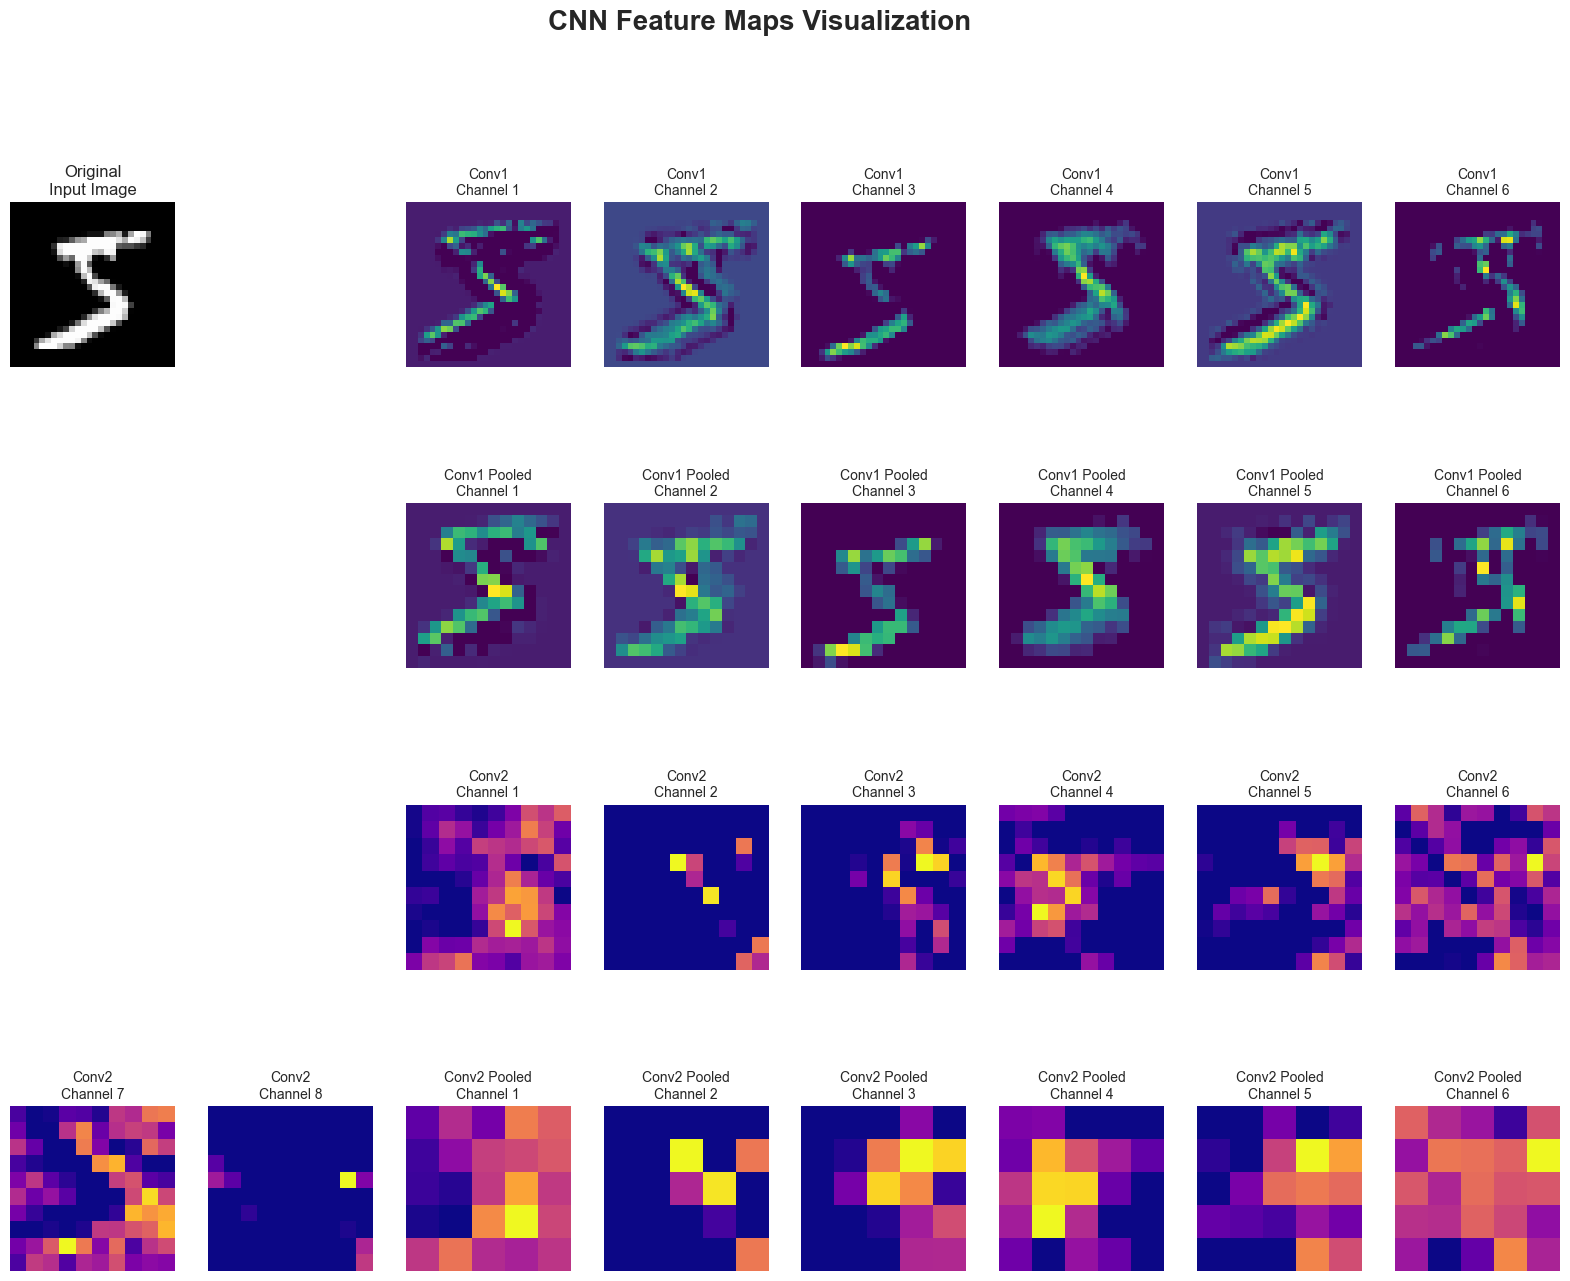

In [8]:
# ============================================================================
# PART 7: BUILDING A SIMPLE CNN AND VISUALIZING FEATURE MAPS
# ============================================================================

class SimpleCNN(nn.Module):
    """
    A simple CNN for MNIST digit classification with visualization capabilities
    """
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # First convolutional layer: 1 input channel, 6 output channels, 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, padding=2)
        
        # Second convolutional layer: 6 input channels, 16 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 16 channels * 5x5 feature maps
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 classes (digits 0-9)
        
    def forward(self, x):
        # Store intermediate feature maps for visualization
        self.feature_maps = {}
        
        # First conv layer + ReLU + MaxPool
        x = self.conv1(x)
        self.feature_maps['conv1'] = x.clone()
        x = F.relu(x)
        self.feature_maps['conv1_relu'] = x.clone()
        x = F.max_pool2d(x, 2)
        self.feature_maps['conv1_pooled'] = x.clone()
        
        # Second conv layer + ReLU + MaxPool
        x = self.conv2(x)
        self.feature_maps['conv2'] = x.clone()
        x = F.relu(x)
        self.feature_maps['conv2_relu'] = x.clone()
        x = F.max_pool2d(x, 2)
        self.feature_maps['conv2_pooled'] = x.clone()
        
        # Flatten for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

def visualize_cnn_features():
    """
    Create and visualize feature maps from a simple CNN
    """
    print("\n" + "="*60)
    print("PART 7: Building a Simple CNN and Visualizing Feature Maps")
    print("="*60)
    
    # Create the CNN model
    model = SimpleCNN()
    model.eval()  # Set to evaluation mode
    
    print("CNN Architecture:")
    print(model)
    print()
    
    # Prepare input (add batch dimension)
    input_tensor = torch.tensor(mnist_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    print(f"Input shape: {input_tensor.shape}")
    
    # Forward pass
    with torch.no_grad():
        output = model(input_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    
    print(f"Predicted class: {predicted_class}")
    print(f"Actual class: {digit_label}")
    print()
    
    # Visualize feature maps
    feature_maps = model.feature_maps
    
    # Create a comprehensive visualization
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('CNN Feature Maps Visualization', fontsize=20, fontweight='bold')
    
    # Original image
    ax = plt.subplot(4, 8, 1)
    plt.imshow(mnist_image, cmap='gray')
    plt.title('Original\nInput Image', fontsize=12)
    plt.axis('off')
    
    # First conv layer feature maps (6 channels)
    conv1_maps = feature_maps['conv1_relu'][0]  # Remove batch dimension
    for i in range(6):
        ax = plt.subplot(4, 8, i + 3)
        plt.imshow(conv1_maps[i].detach().numpy(), cmap='viridis')
        plt.title(f'Conv1\nChannel {i+1}', fontsize=10)
        plt.axis('off')
    
    # First conv layer after pooling
    conv1_pooled = feature_maps['conv1_pooled'][0]
    for i in range(6):
        ax = plt.subplot(4, 8, i + 11)
        plt.imshow(conv1_pooled[i].detach().numpy(), cmap='viridis')
        plt.title(f'Conv1 Pooled\nChannel {i+1}', fontsize=10)
        plt.axis('off')
    
    # Second conv layer feature maps (show first 8 of 16 channels)
    conv2_maps = feature_maps['conv2_relu'][0]
    for i in range(8):
        ax = plt.subplot(4, 8, i + 19)
        plt.imshow(conv2_maps[i].detach().numpy(), cmap='plasma')
        plt.title(f'Conv2\nChannel {i+1}', fontsize=10)
        plt.axis('off')
    
    # Second conv layer after pooling (show first 8 of 16 channels)
    conv2_pooled = feature_maps['conv2_pooled'][0]
    for i in range(8):
        ax = plt.subplot(4, 8, i + 27)
        plt.imshow(conv2_pooled[i].detach().numpy(), cmap='plasma')
        plt.title(f'Conv2 Pooled\nChannel {i+1}', fontsize=10)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information about each layer
    print("Feature Map Details:")
    print("-" * 40)
    for name, feature_map in feature_maps.items():
        shape = feature_map.shape
        print(f"{name:15} : {shape}")
        print(f"{'':15}   Range: [{feature_map.min():.3f}, {feature_map.max():.3f}]")
        print(f"{'':15}   Mean: {feature_map.mean():.3f}, Std: {feature_map.std():.3f}")
        print()
    
    # Visualize kernels/filters
    print("Visualizing Learned Kernels:")
    print("-" * 40)
    
    # First layer kernels
    conv1_weights = model.conv1.weight.data  # Shape: (6, 1, 5, 5)
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('First Layer Kernels (6 filters, 5×5 each)', fontsize=16, fontweight='bold')
    
    for i in range(6):
        row = i // 3
        col = i % 3
        kernel = conv1_weights[i, 0].detach().numpy()  # First (and only) input channel
        
        im = axes[row, col].imshow(kernel, cmap='RdBu_r', vmin=-1, vmax=1)
        axes[row, col].set_title(f'Filter {i+1}', fontsize=12)
        axes[row, col].axis('off')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)
        
        print(f"Filter {i+1}:")
        print(kernel)
        print()
    
    plt.tight_layout()
    plt.show()

visualize_cnn_features()


PART 8: Interactive Convolution Animation
Demo Image:
[[0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.  0.5 1.  1.  1.  1.  0.  0. ]
 [0.  0.5 1.  2.  2.  1.  0.  0. ]
 [0.  0.5 1.  2.  2.  1.  0.  0. ]
 [0.  0.5 1.  1.  1.  1.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]]

Kernel:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


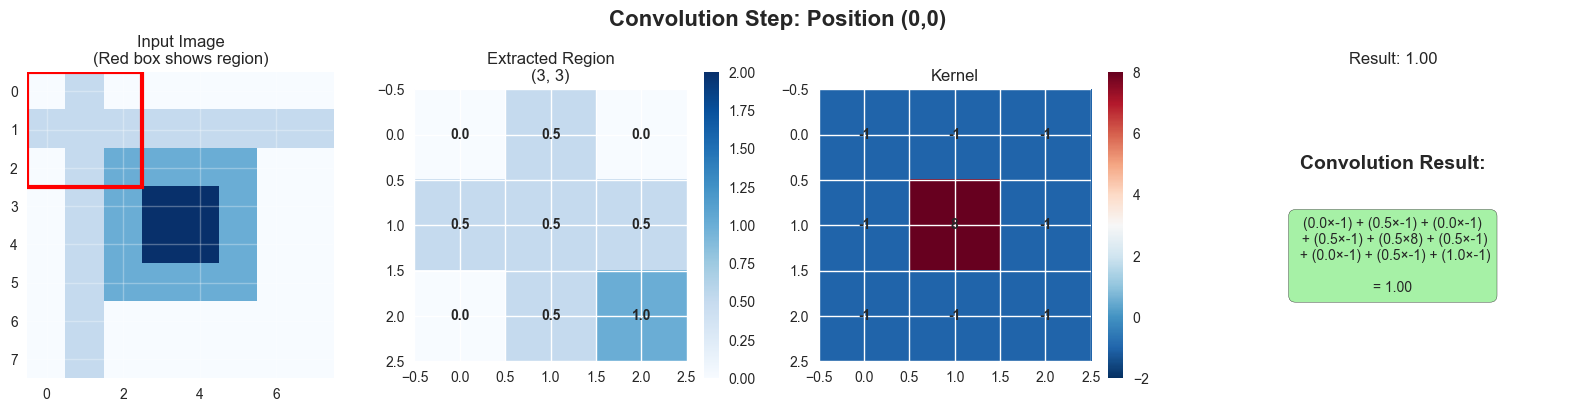

Position (0,0): 1.00


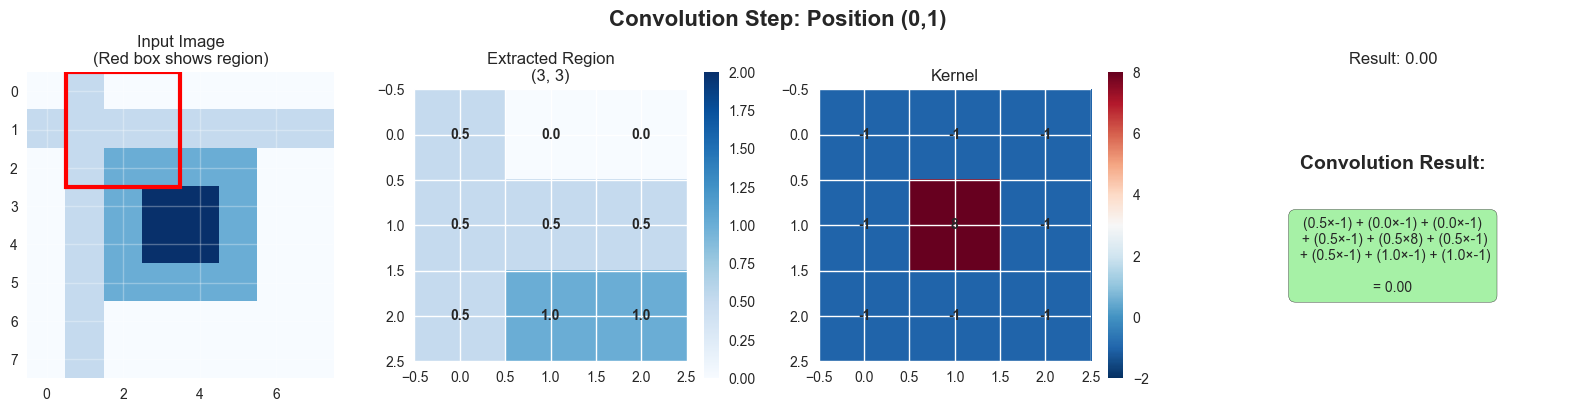

Position (0,1): 0.00


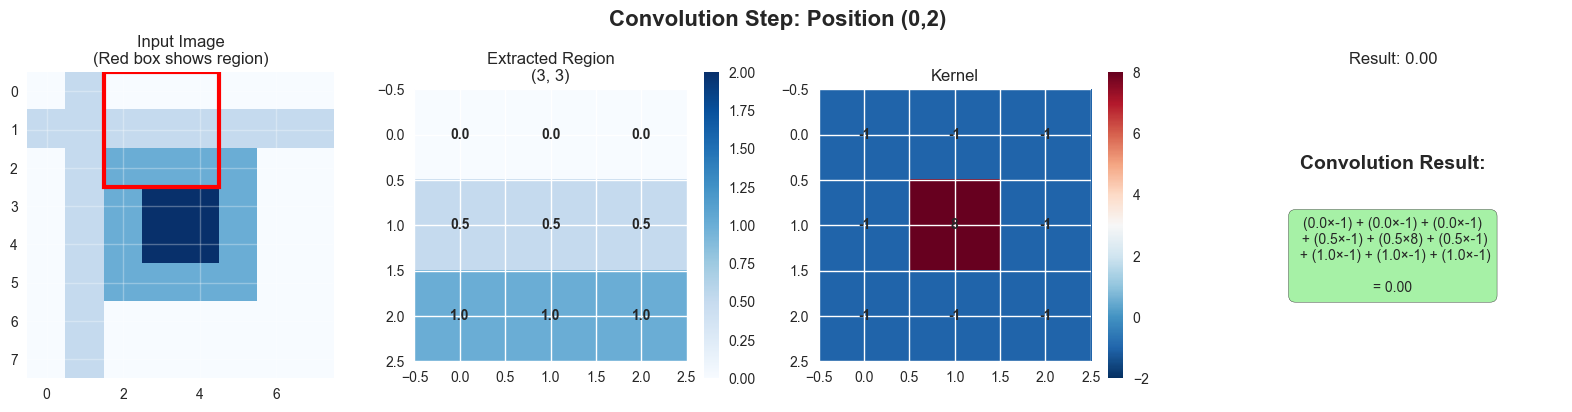

Position (0,2): 0.00


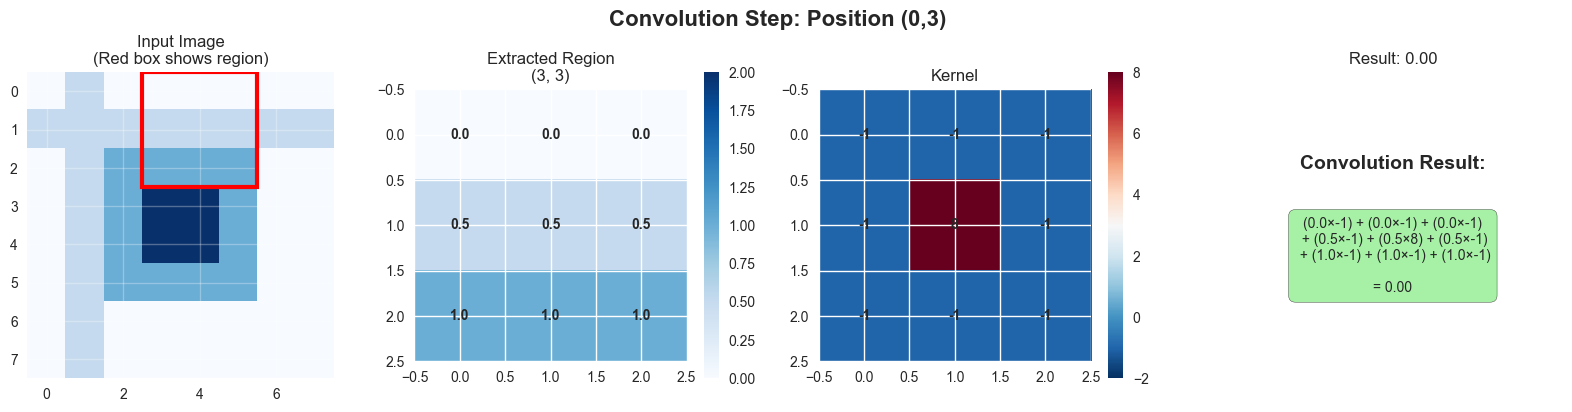

Position (0,3): 0.00


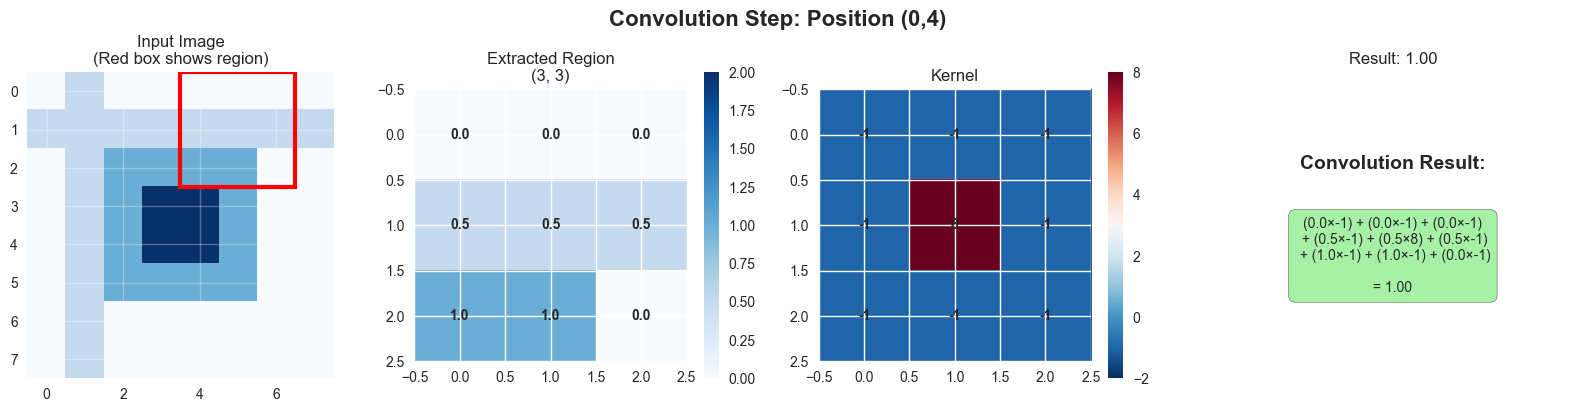

Position (0,4): 1.00


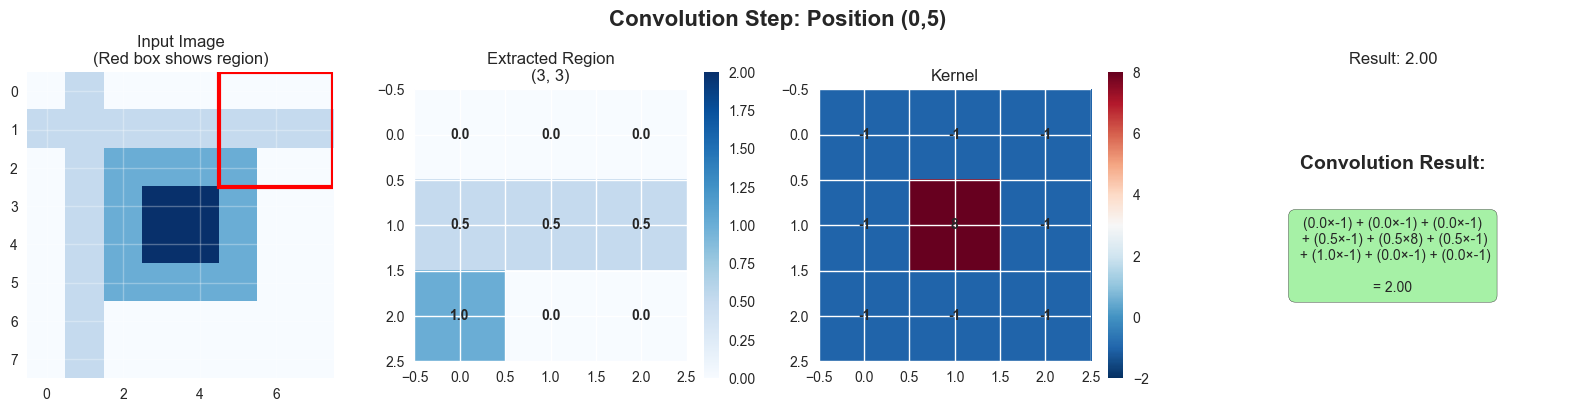

Position (0,5): 2.00


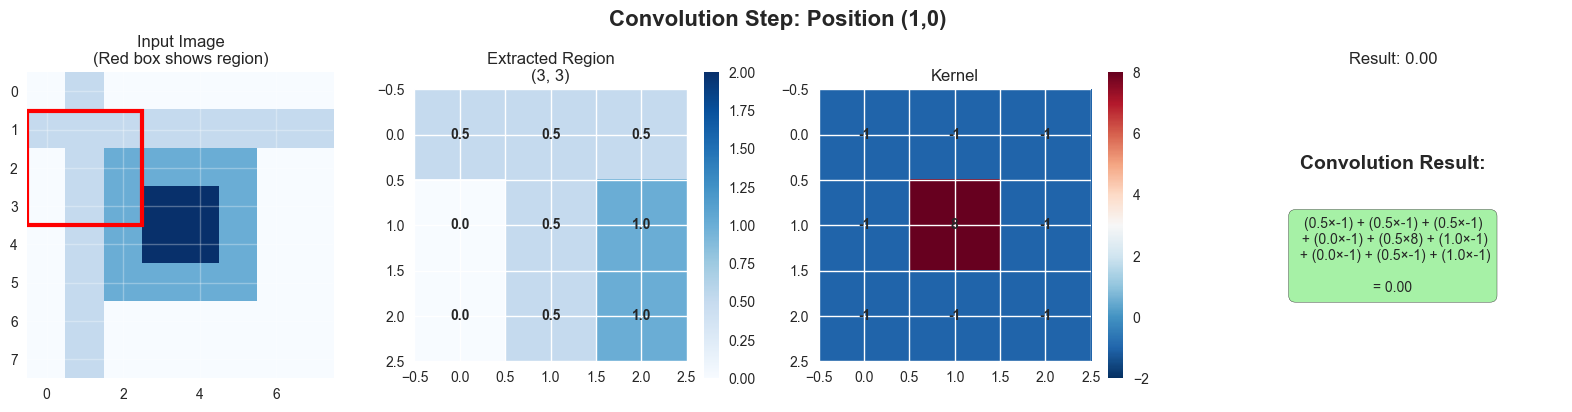

Position (1,0): 0.00


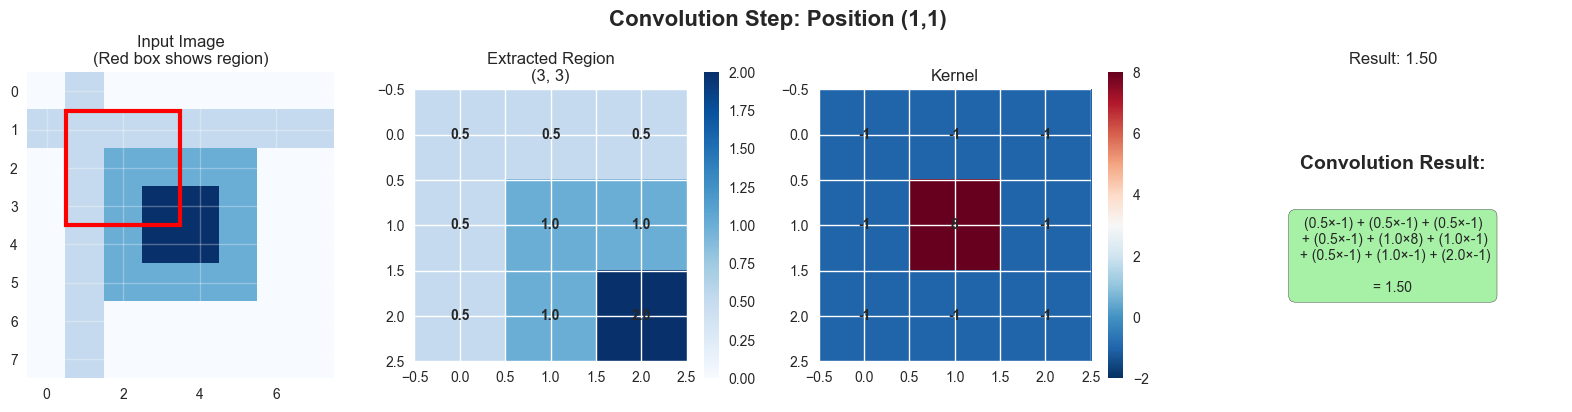

Position (1,1): 1.50


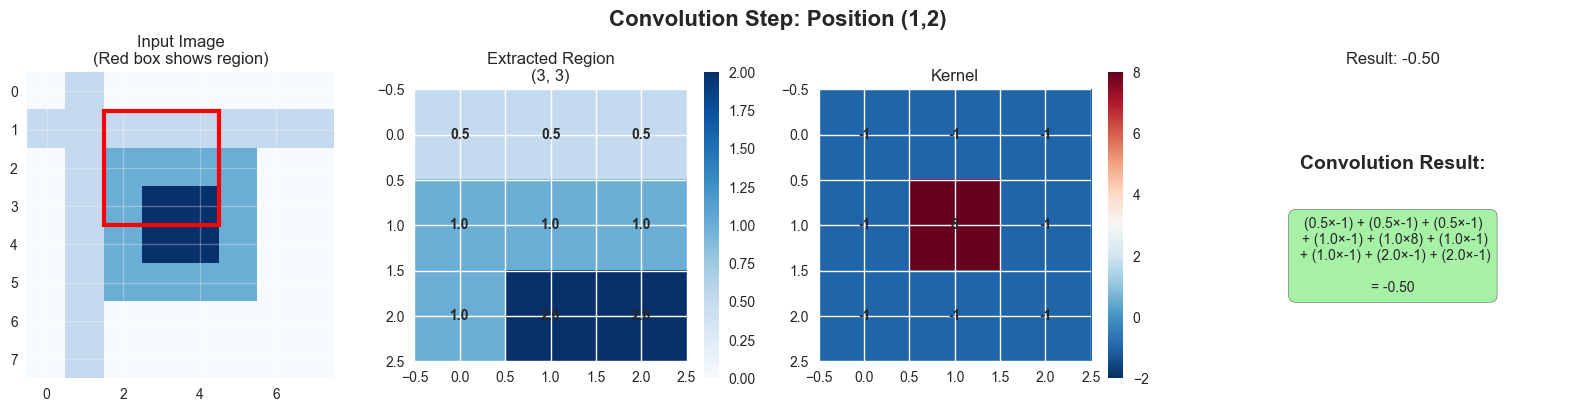

Position (1,2): -0.50


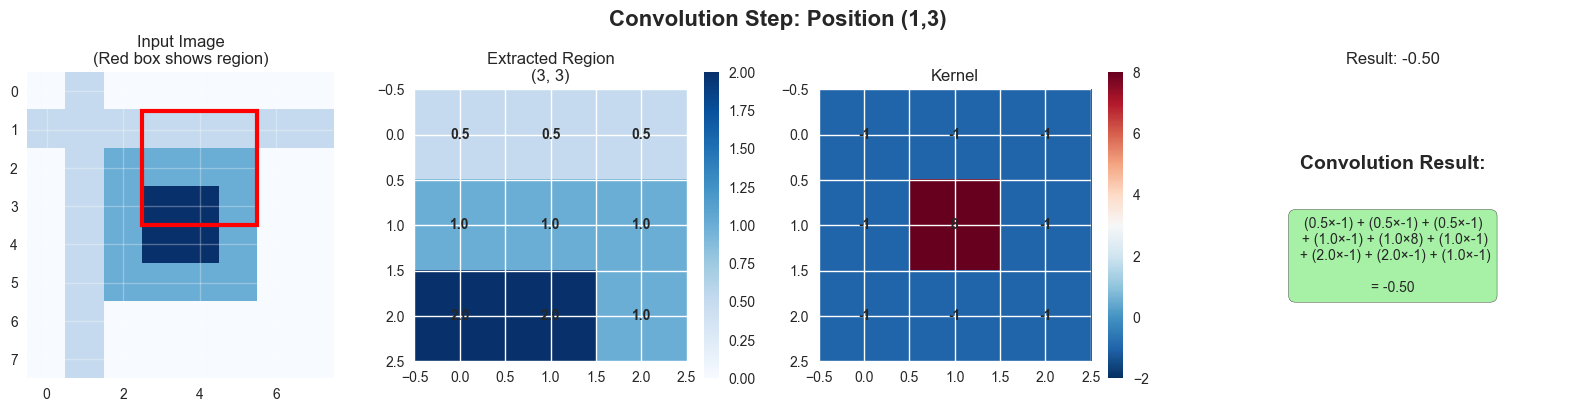

Position (1,3): -0.50


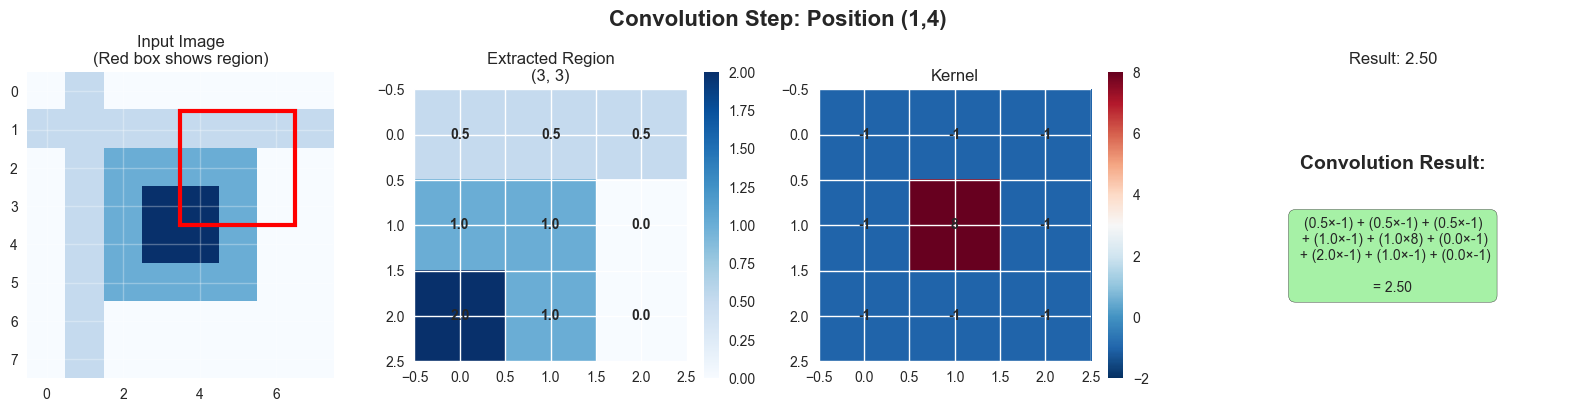

Position (1,4): 2.50


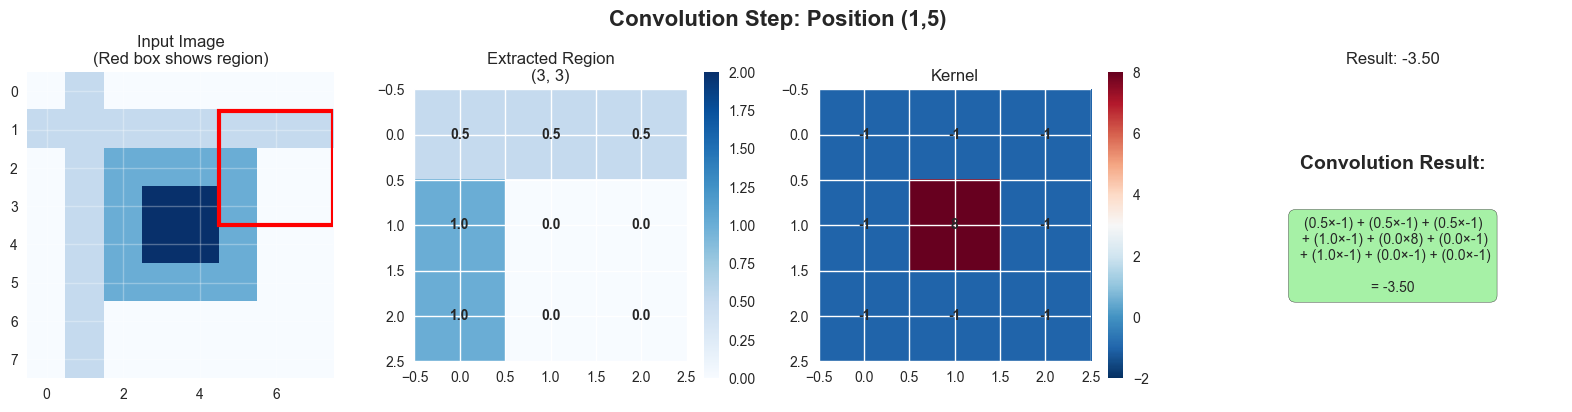

Position (1,5): -3.50


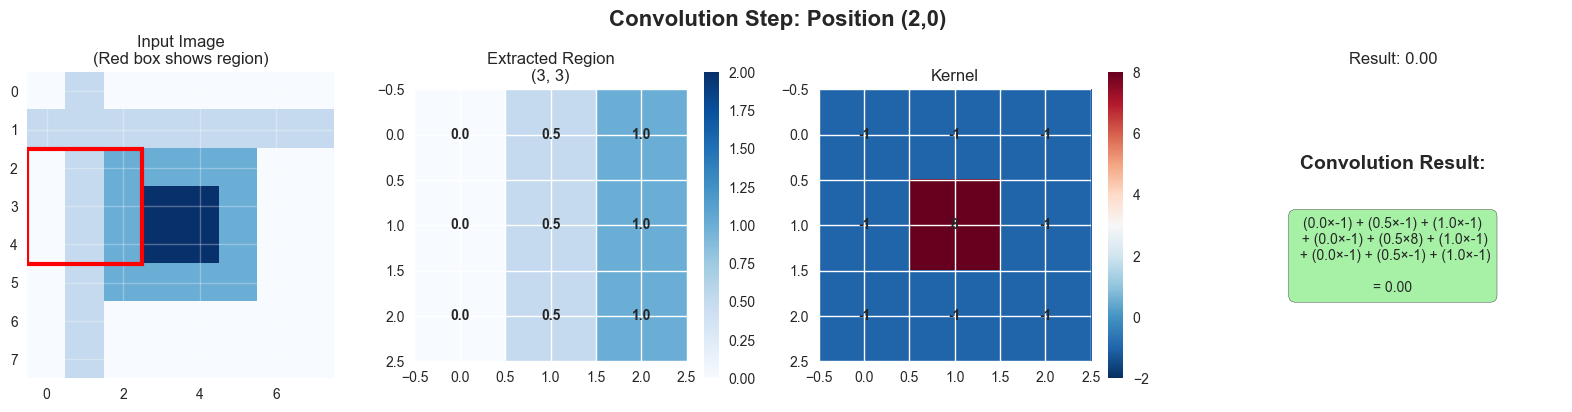

Position (2,0): 0.00


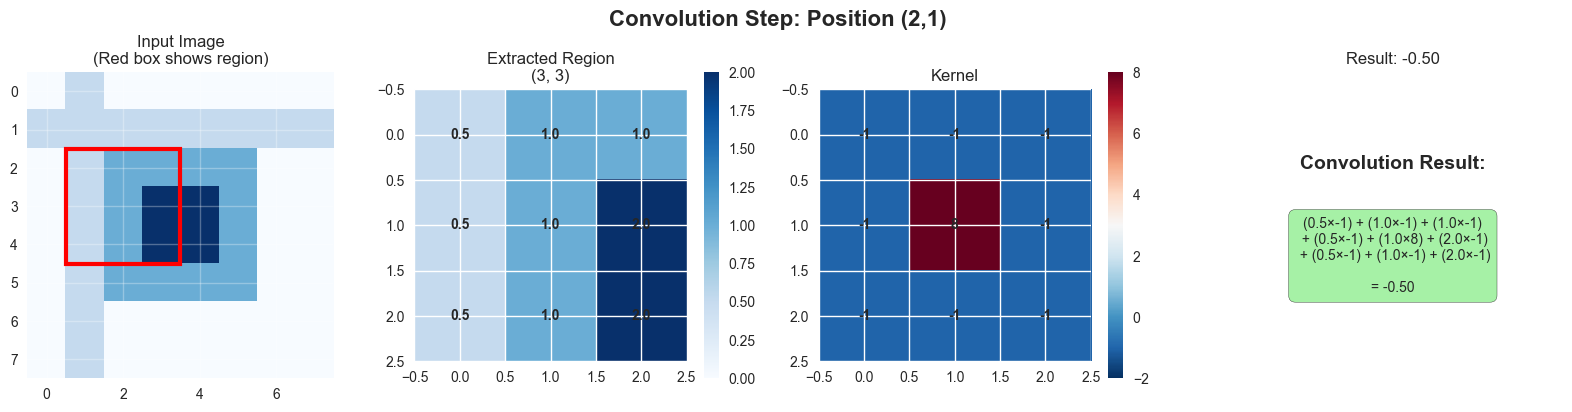

Position (2,1): -0.50


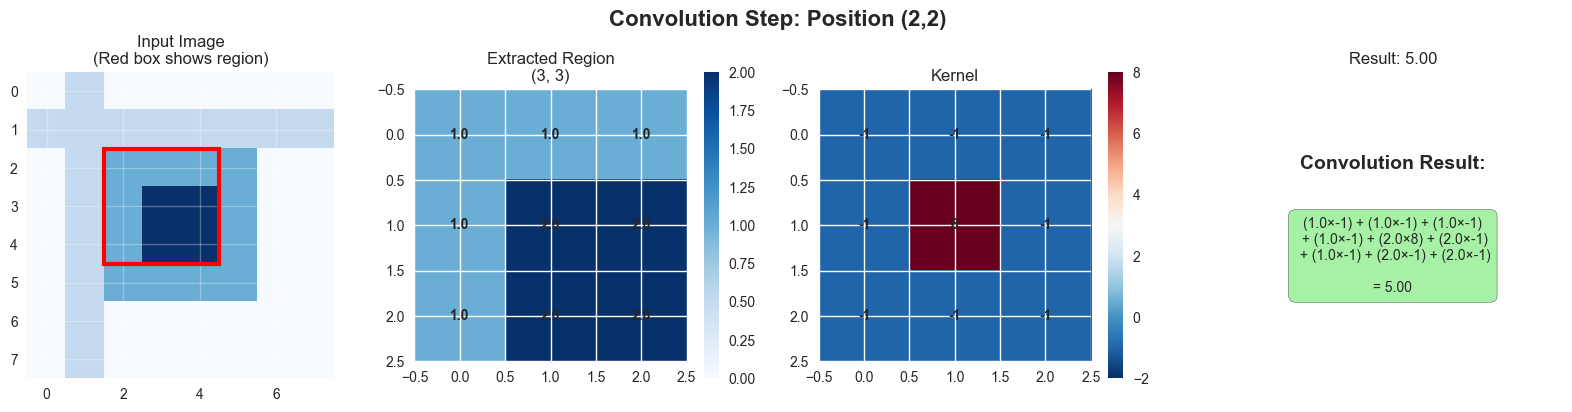

Position (2,2): 5.00


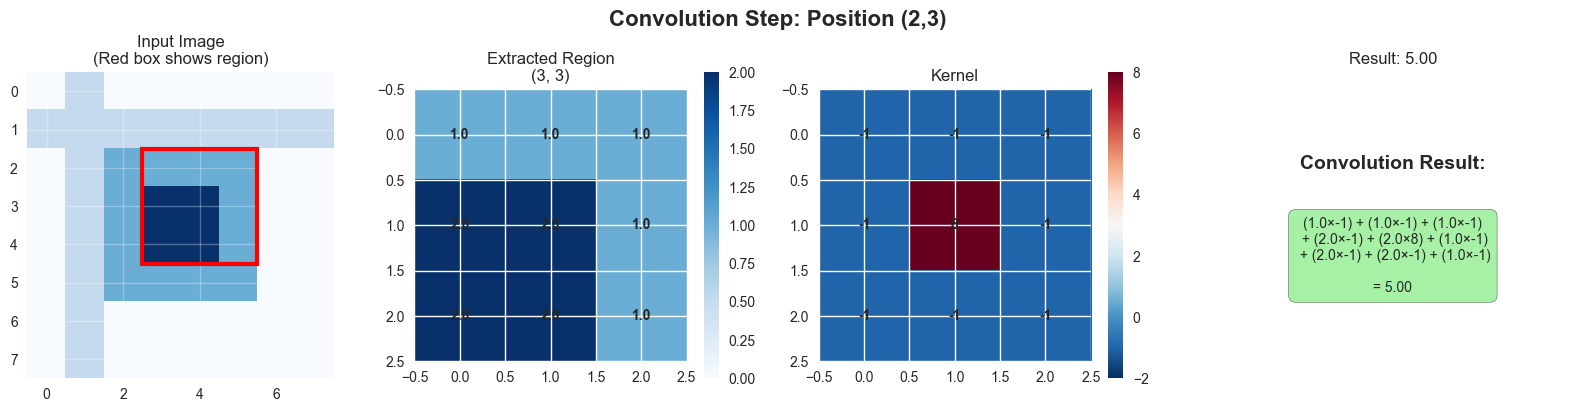

Position (2,3): 5.00


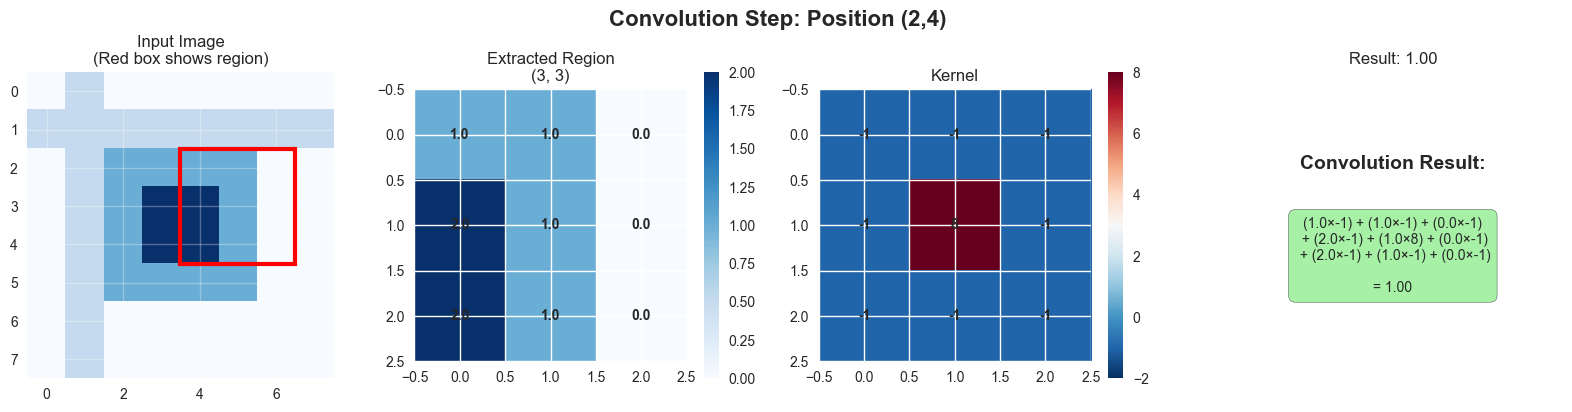

Position (2,4): 1.00


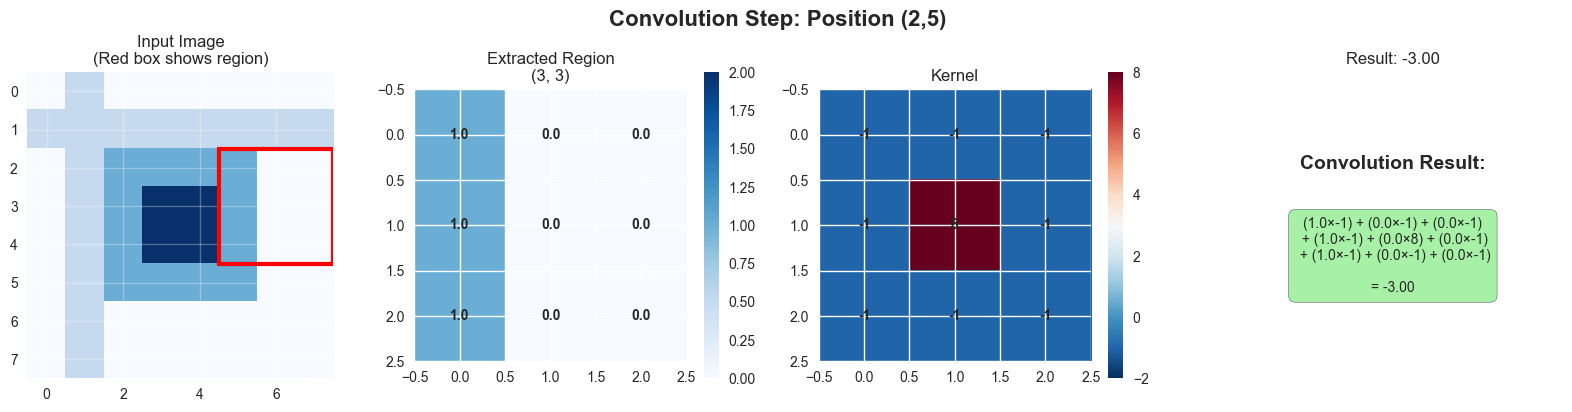

Position (2,5): -3.00


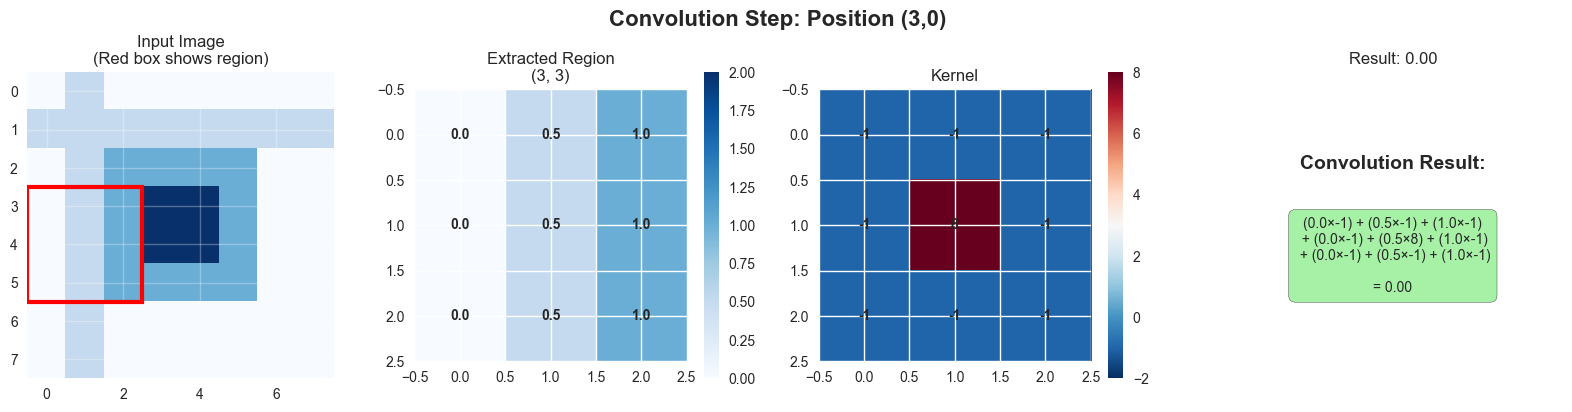

Position (3,0): 0.00


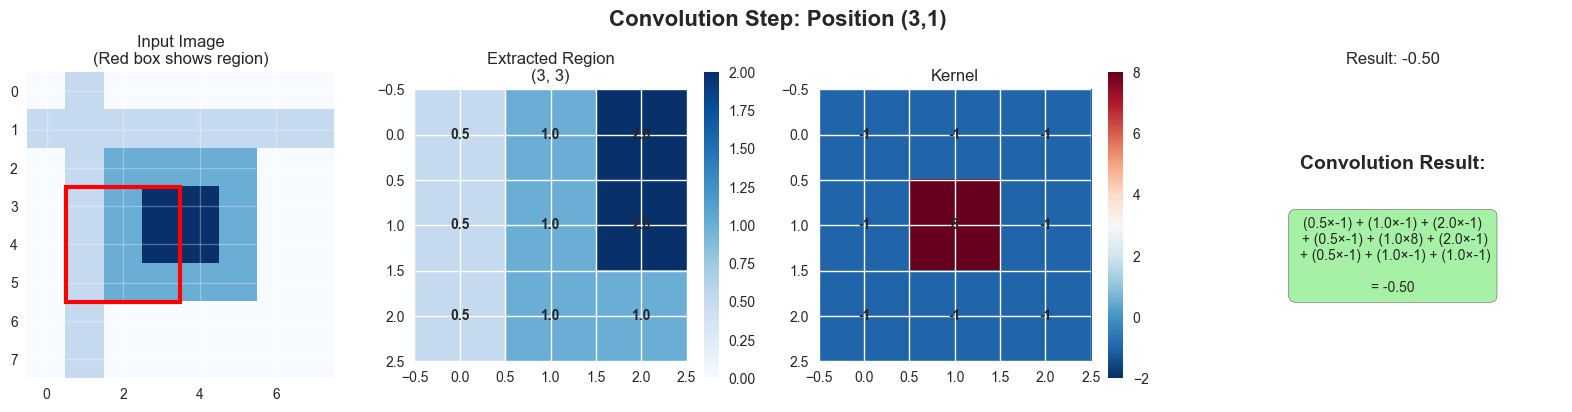

Position (3,1): -0.50


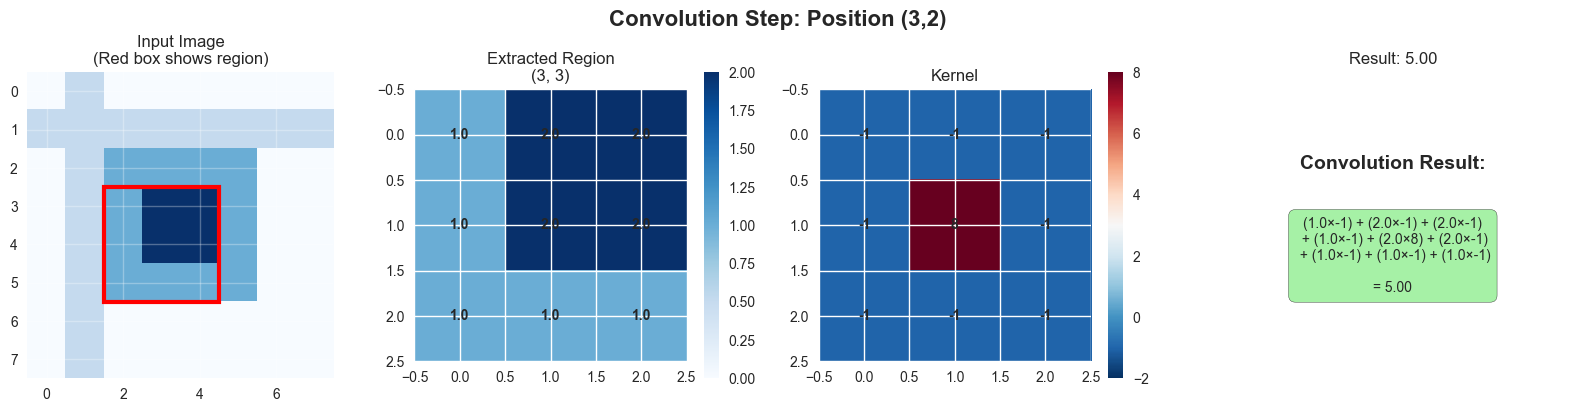

Position (3,2): 5.00


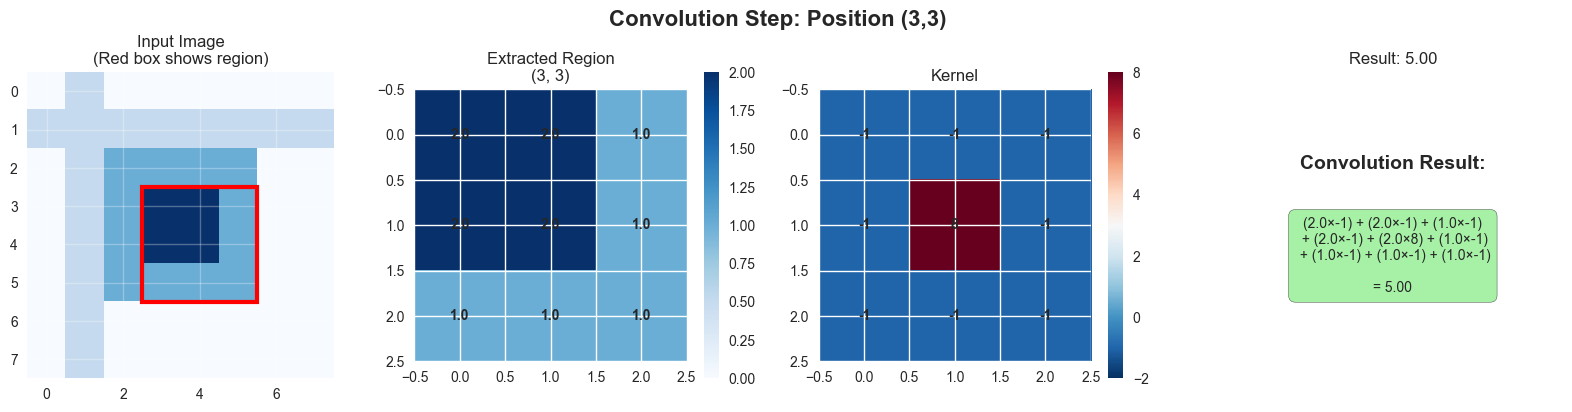

Position (3,3): 5.00


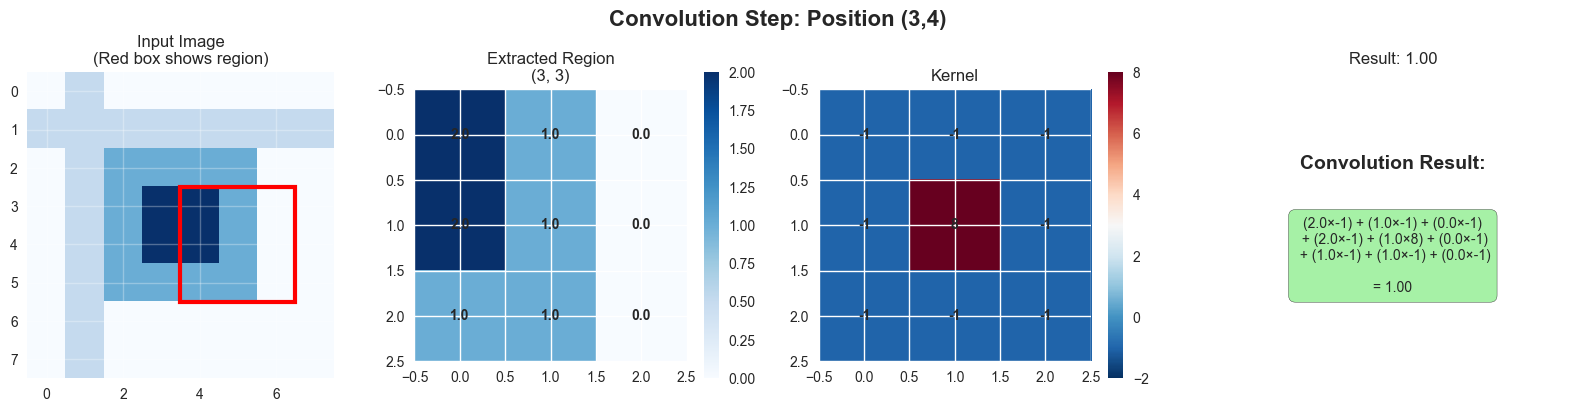

Position (3,4): 1.00


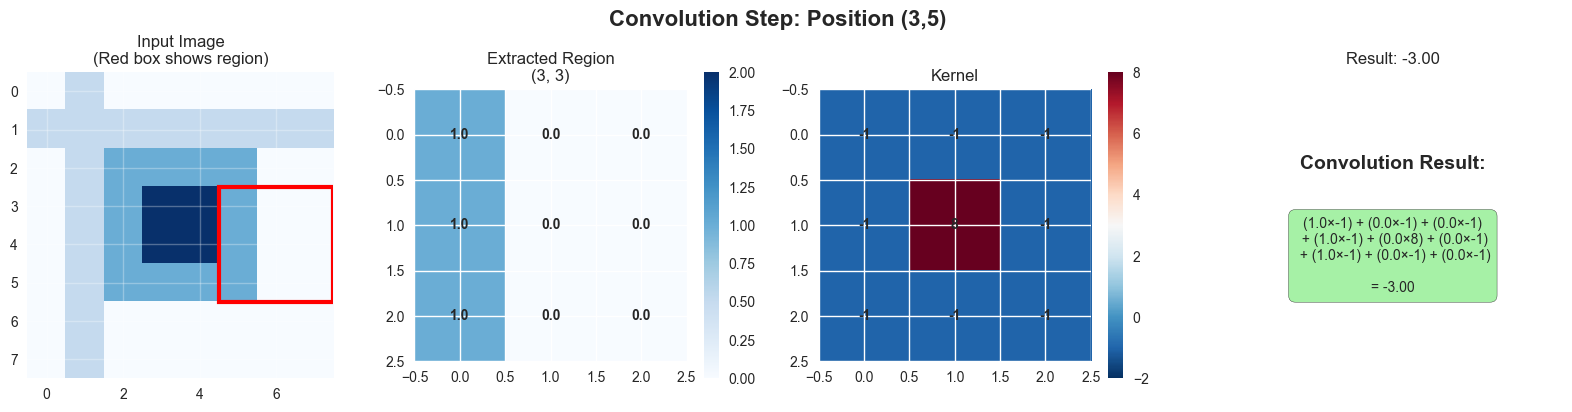

Position (3,5): -3.00


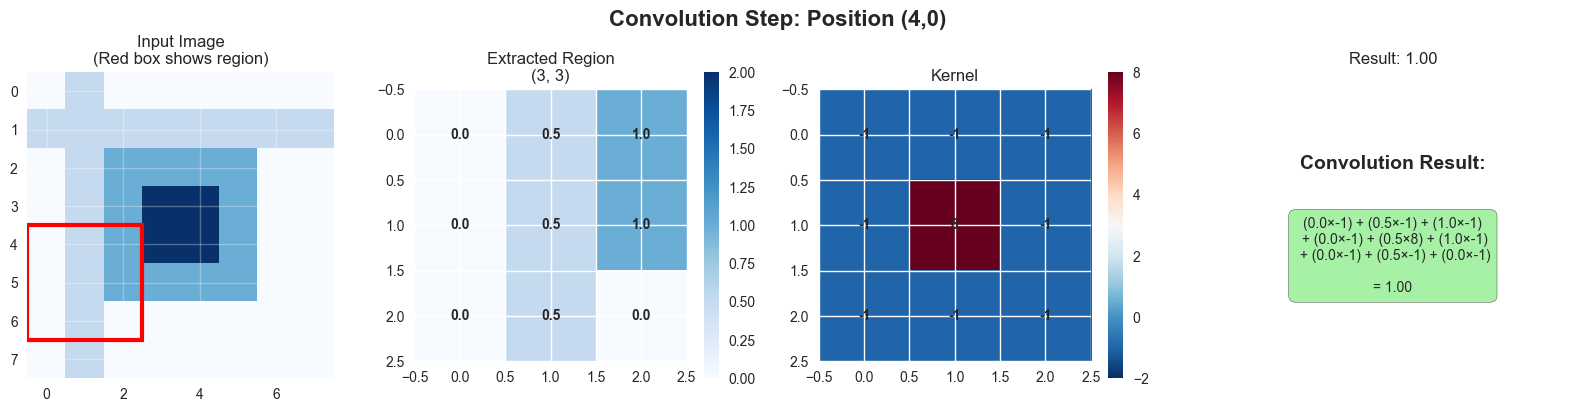

Position (4,0): 1.00


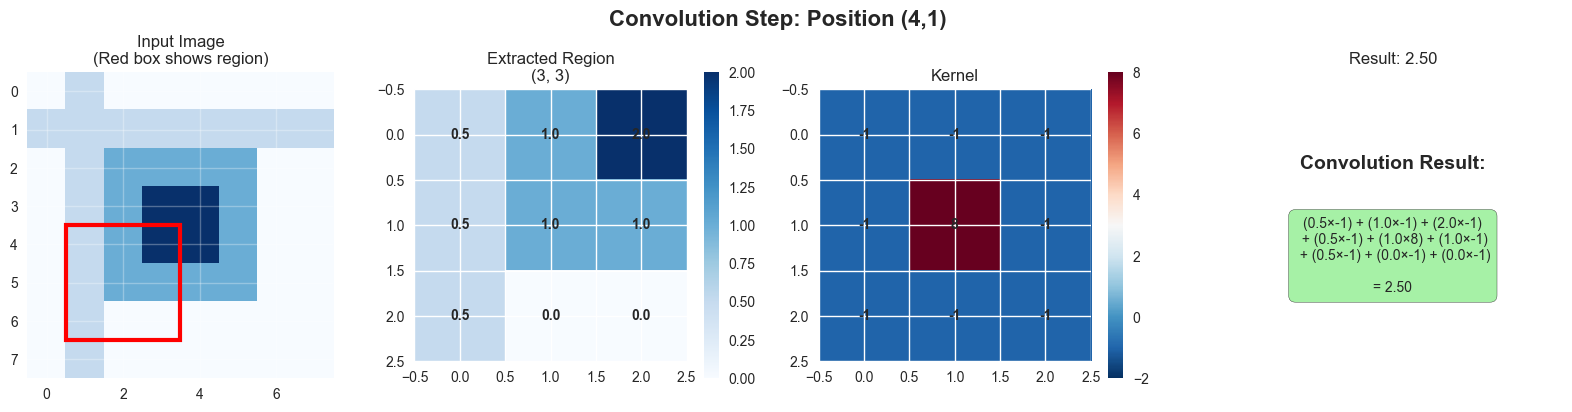

Position (4,1): 2.50


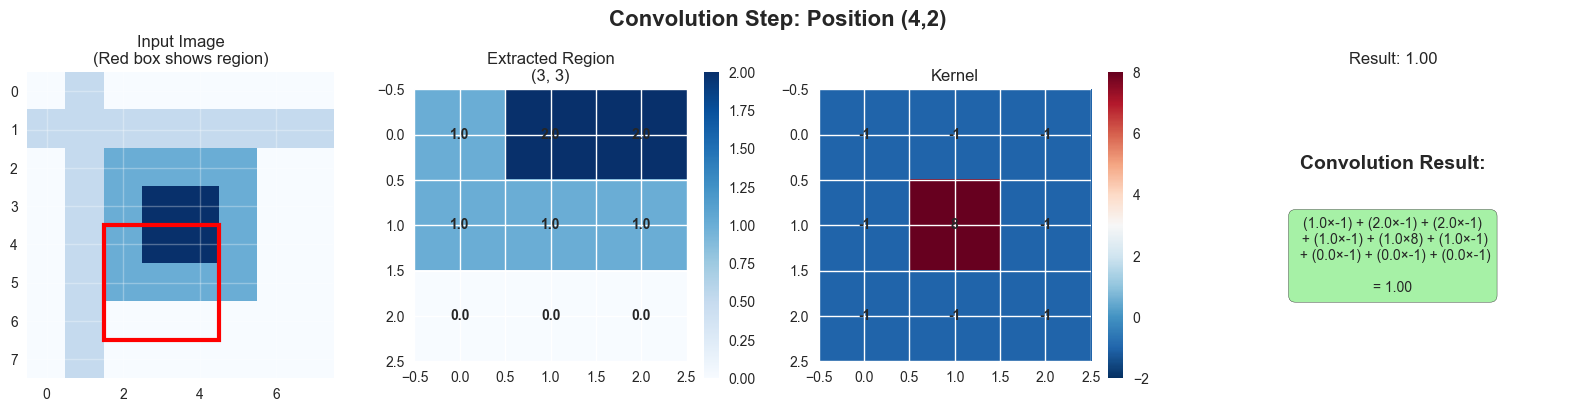

Position (4,2): 1.00


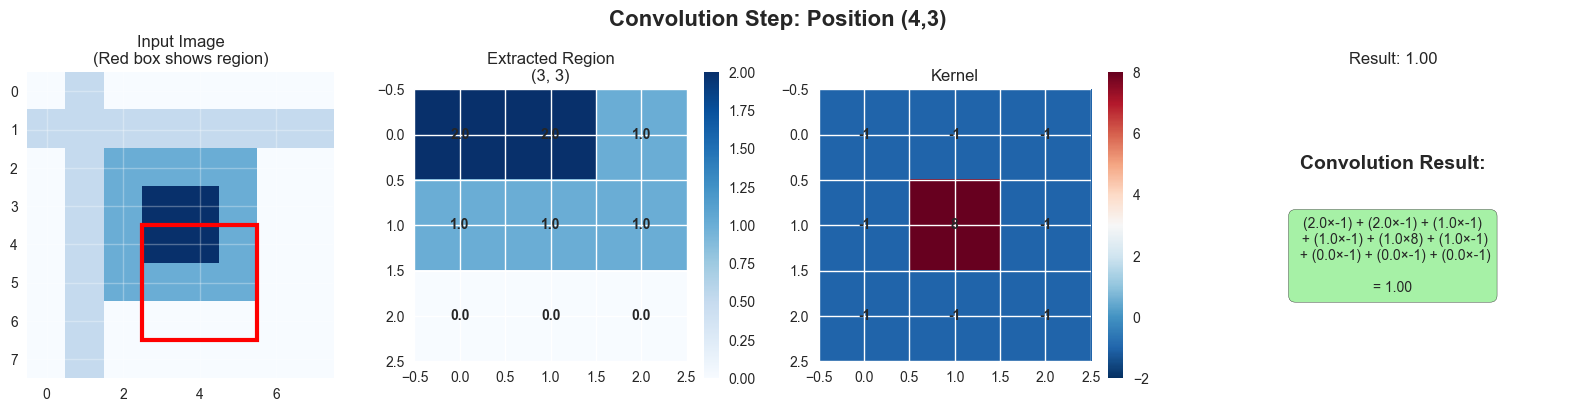

Position (4,3): 1.00


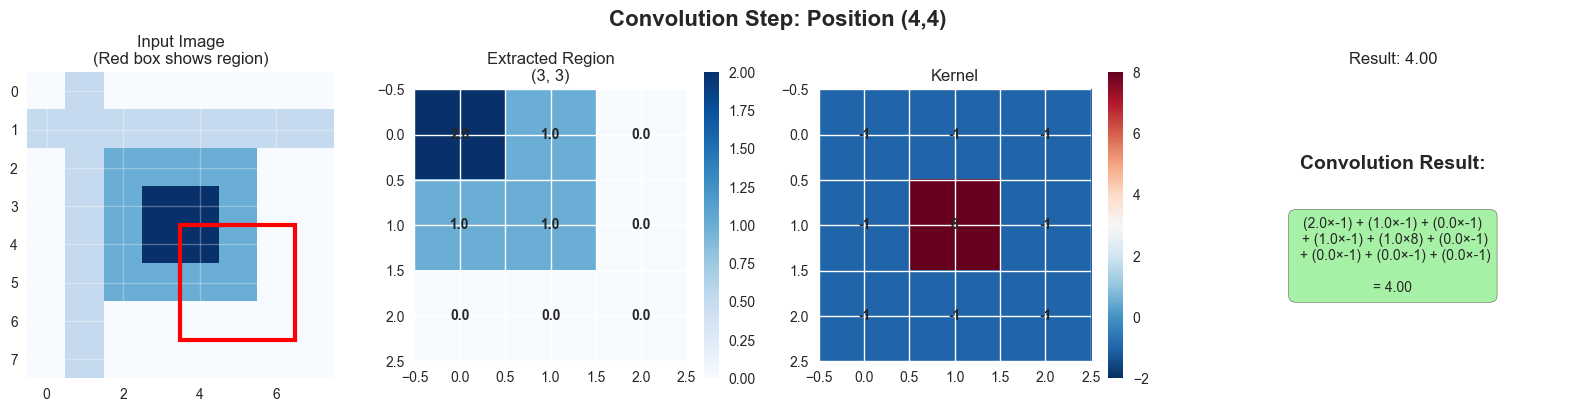

Position (4,4): 4.00


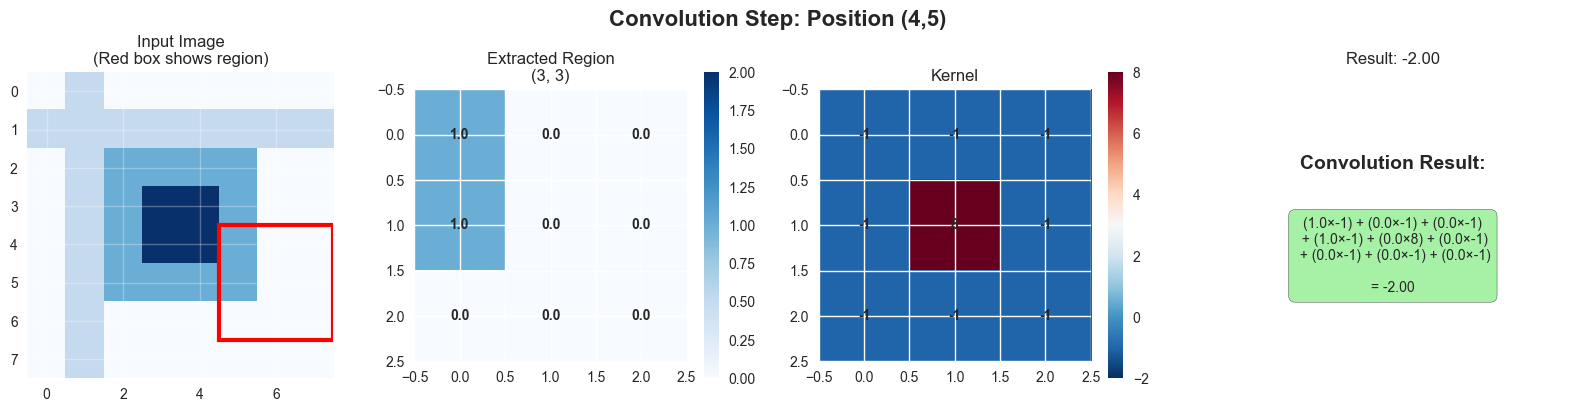

Position (4,5): -2.00


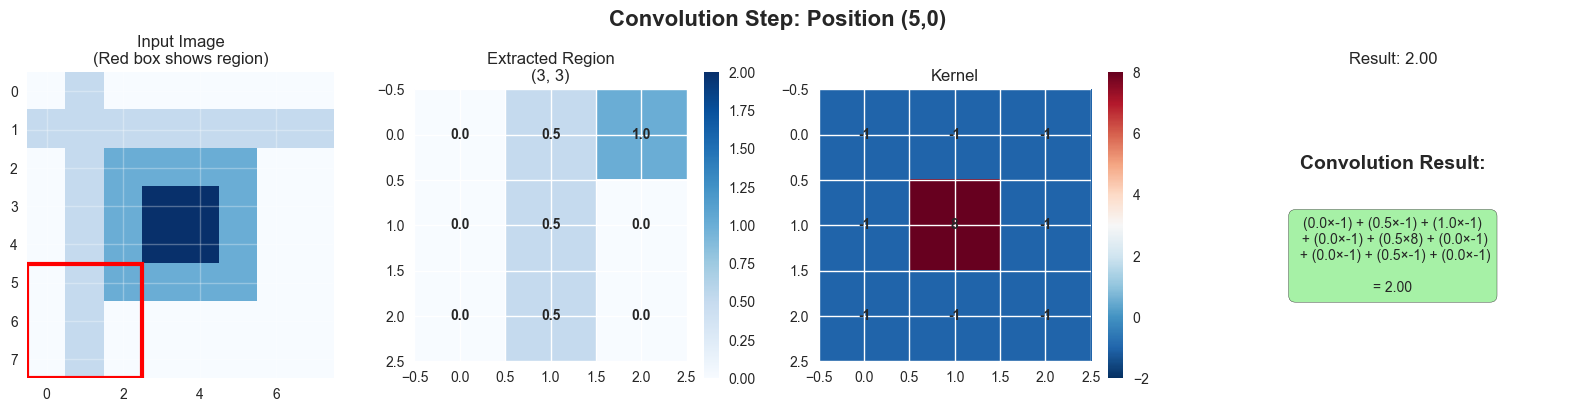

Position (5,0): 2.00


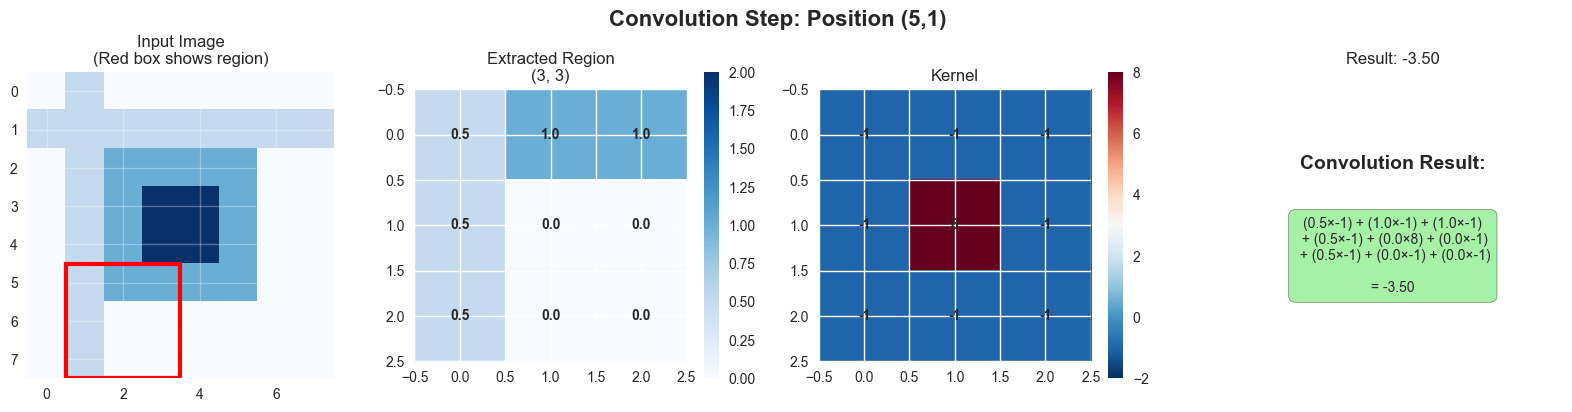

Position (5,1): -3.50


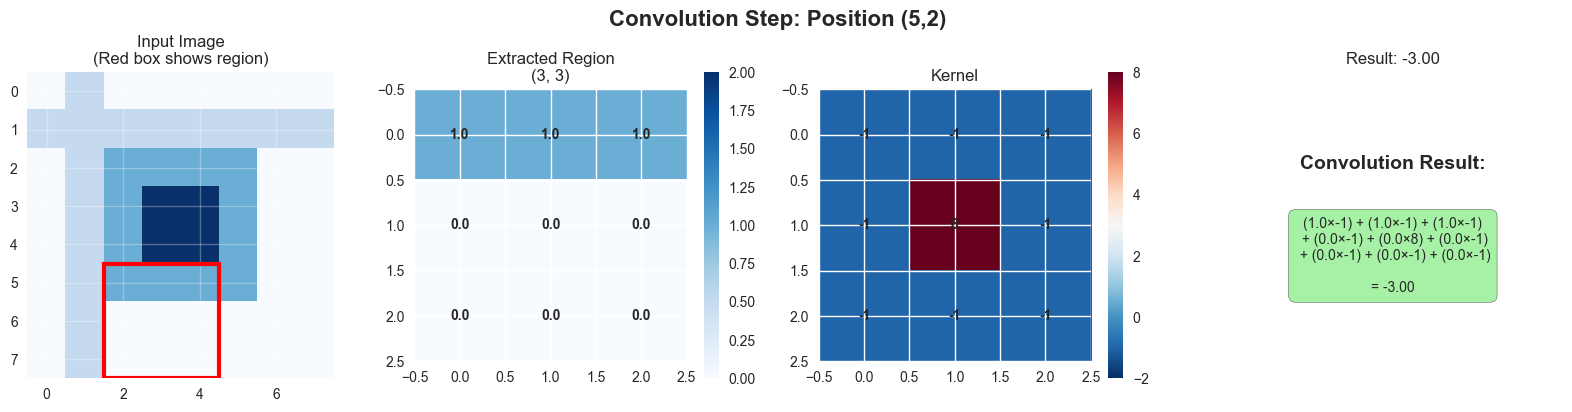

Position (5,2): -3.00


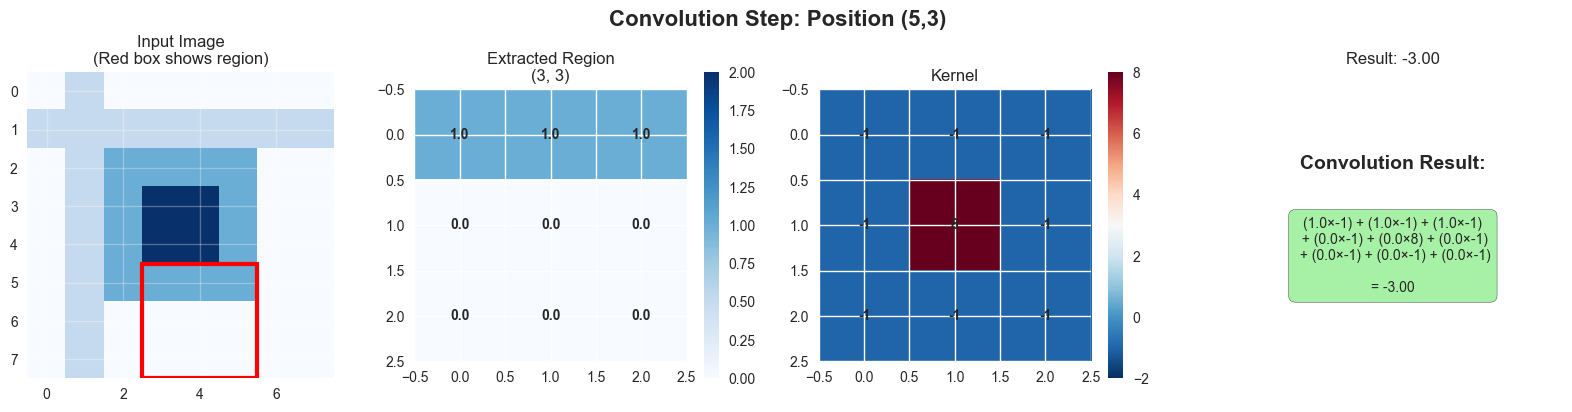

Position (5,3): -3.00


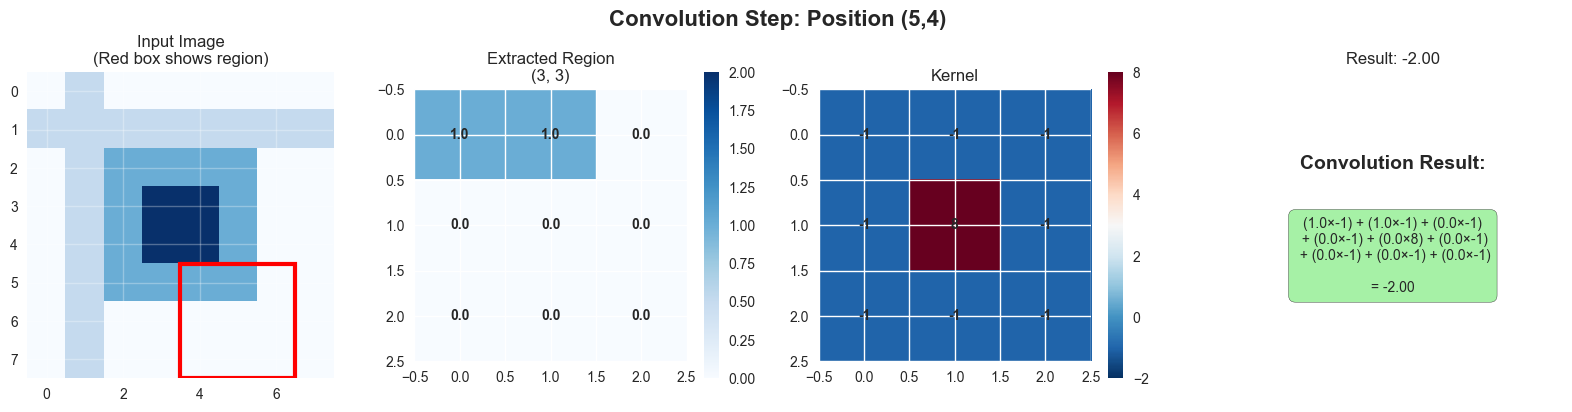

Position (5,4): -2.00


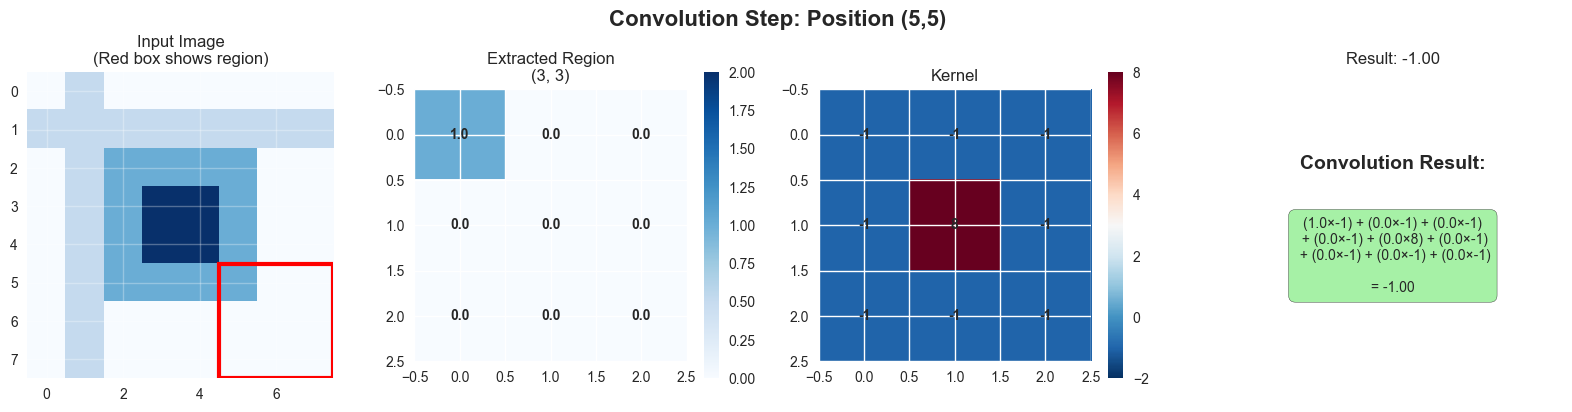

Position (5,5): -1.00


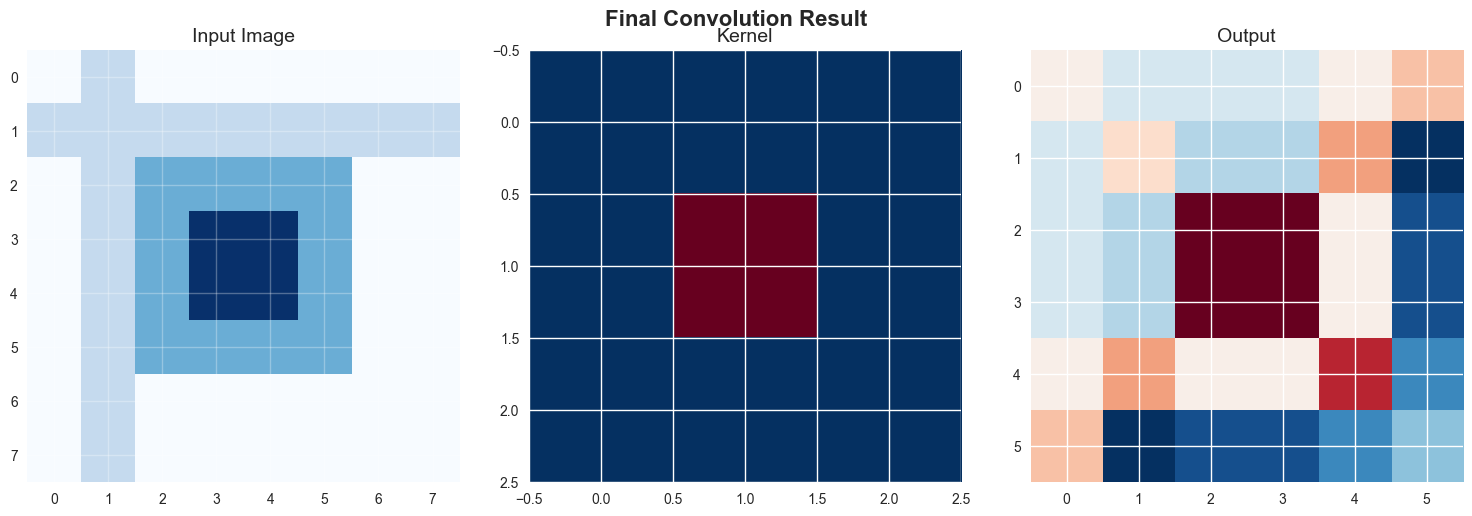


Final output:
[[ 1.   0.   0.   0.   1.   2. ]
 [ 0.   1.5 -0.5 -0.5  2.5 -3.5]
 [ 0.  -0.5  5.   5.   1.  -3. ]
 [ 0.  -0.5  5.   5.   1.  -3. ]
 [ 1.   2.5  1.   1.   4.  -2. ]
 [ 2.  -3.5 -3.  -3.  -2.  -1. ]]


In [9]:
# ============================================================================
# PART 8: INTERACTIVE CONVOLUTION DEMONSTRATION
# ============================================================================

def create_interactive_convolution_demo():
    """
    Create an interactive demonstration showing convolution step by step
    """
    print("\n" + "="*60)
    print("PART 8: Interactive Convolution Animation")
    print("="*60)
    
    # Create a simple 2D signal with clear features
    def create_demo_image():
        img = np.zeros((8, 8))
        # Add some patterns
        img[2:6, 2:6] = 1  # Square
        img[3:5, 3:5] = 2  # Inner square
        img[1, :] = 0.5    # Horizontal line
        img[:, 1] = 0.5    # Vertical line
        return img
    
    demo_image = create_demo_image()
    kernel = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])  # Edge detection kernel
    
    print("Demo Image:")
    print(demo_image)
    print("\nKernel:")
    print(kernel)
    
    # Calculate dimensions
    img_h, img_w = demo_image.shape
    ker_h, ker_w = kernel.shape
    out_h = img_h - ker_h + 1
    out_w = img_w - ker_w + 1
    
    # Create animation frames
    frames = []
    
    for i in range(out_h):
        for j in range(out_w):
            # Extract region
            region = demo_image[i:i+ker_h, j:j+ker_w]
            
            # Calculate convolution
            conv_result = np.sum(region * kernel)
            
            # Create frame
            fig, axes = plt.subplots(1, 4, figsize=(16, 4))
            fig.suptitle(f'Convolution Step: Position ({i},{j})', fontsize=16, fontweight='bold')
            
            # Original image with highlighted region
            axes[0].imshow(demo_image, cmap='Blues', vmin=0, vmax=2)
            rect = Rectangle((j-0.5, i-0.5), ker_w, ker_h, 
                           fill=False, edgecolor='red', linewidth=3)
            axes[0].add_patch(rect)
            axes[0].set_title('Input Image\n(Red box shows region)', fontsize=12)
            axes[0].grid(True, alpha=0.3)
            
            # Extracted region
            im1 = axes[1].imshow(region, cmap='Blues', vmin=0, vmax=2)
            axes[1].set_title(f'Extracted Region\n{region.shape}', fontsize=12)
            for r in range(ker_h):
                for c in range(ker_w):
                    axes[1].text(c, r, f'{region[r,c]:.1f}', 
                               ha='center', va='center', fontsize=10, fontweight='bold')
            plt.colorbar(im1, ax=axes[1])
            
            # Kernel
            im2 = axes[2].imshow(kernel, cmap='RdBu_r', vmin=-2, vmax=8)
            axes[2].set_title('Kernel', fontsize=12)
            for r in range(ker_h):
                for c in range(ker_w):
                    axes[2].text(c, r, f'{kernel[r,c]:.0f}', 
                               ha='center', va='center', fontsize=10, fontweight='bold')
            plt.colorbar(im2, ax=axes[2])
            
            # Calculation visualization
            axes[3].text(0.5, 0.7, f'Convolution Result:', ha='center', va='center', 
                        fontsize=14, fontweight='bold', transform=axes[3].transAxes)
            
            calculation_text = ""
            for r in range(ker_h):
                for c in range(ker_w):
                    if r > 0 or c > 0:
                        calculation_text += " + "
                    calculation_text += f"({region[r,c]:.1f}×{kernel[r,c]:.0f})"
                    if c == ker_w - 1:
                        calculation_text += "\n"
            
            calculation_text += f"\n= {conv_result:.2f}"
            
            axes[3].text(0.5, 0.4, calculation_text, ha='center', va='center', 
                        fontsize=10, transform=axes[3].transAxes,
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
            
            axes[3].axis('off')
            axes[3].set_title(f'Result: {conv_result:.2f}', fontsize=12)
            
            plt.tight_layout()
            plt.show()
            
            print(f"Position ({i},{j}): {conv_result:.2f}")
    
    # Final result
    image_tensor = torch.tensor(demo_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    final_result = F.conv2d(image_tensor, kernel_tensor).squeeze().detach().numpy()
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Final Convolution Result', fontsize=16, fontweight='bold')
    
    axes[0].imshow(demo_image, cmap='Blues')
    axes[0].set_title('Input Image', fontsize=14)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].imshow(kernel, cmap='RdBu_r')
    axes[1].set_title('Kernel', fontsize=14)
    
    axes[2].imshow(final_result, cmap='RdBu_r')
    axes[2].set_title('Output', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    print("\nFinal output:")
    print(final_result)

create_interactive_convolution_demo()

In [15]:
# ============================================================================
# SUMMARY AND KEY TAKEAWAYS
# ============================================================================

print("\n" + "="*60)
print("🎯 KEY TAKEAWAYS AND SUMMARY")
print("="*60)

summary_text = """
CONVOLUTION OPERATION FUNDAMENTALS:
1. Convolution is element-wise multiplication followed by summation
2. The kernel/filter slides across the input with a specified stride
3. Each position produces one output value
4. Convolution detects patterns and features in data

1D CONVOLUTION:
- Works on signals/sequences
- Kernel slides left to right
- Output length = Input length - Kernel length + 1 (without padding)
- Common uses: signal processing, time series analysis

2D CONVOLUTION (IMAGES):
- Kernel slides across both height and width dimensions
- Each kernel detects specific features (edges, textures, patterns)
- Output size depends on input size, kernel size, stride, and padding

IMPORTANT PARAMETERS:
- Stride: How much the kernel moves each step (affects output size)
- Padding: Adding zeros around input (controls output size)
- Multiple channels: Each kernel processes all input channels simultaneously
- Multiple kernels: Each kernel produces one feature map

KERNEL EFFECTS:
- Edge detection: Highlight boundaries and transitions
- Blur: Smooth out details and noise
- Sharpen: Enhance edges and details
- Emboss: Create 3D-like effects
- Custom kernels: Can be learned to detect specific patterns

CNN ARCHITECTURE:
- Stack multiple convolutional layers
- Each layer learns increasingly complex features
- Early layers: Simple features (edges, lines)
- Later layers: Complex patterns (shapes, objects)
- Feature maps show what the network "sees"

MATHEMATICAL RELATIONSHIPS:
- Output size = (Input + 2×Padding - Kernel) / Stride + 1
- Number of parameters = (Kernel_height × Kernel_width × Input_channels + 1) × Output_channels
- Receptive field grows with each layer
"""

print(summary_text)




🎯 KEY TAKEAWAYS AND SUMMARY

CONVOLUTION OPERATION FUNDAMENTALS:
1. Convolution is element-wise multiplication followed by summation
2. The kernel/filter slides across the input with a specified stride
3. Each position produces one output value
4. Convolution detects patterns and features in data

1D CONVOLUTION:
- Works on signals/sequences
- Kernel slides left to right
- Output length = Input length - Kernel length + 1 (without padding)
- Common uses: signal processing, time series analysis

2D CONVOLUTION (IMAGES):
- Kernel slides across both height and width dimensions
- Each kernel detects specific features (edges, textures, patterns)
- Output size depends on input size, kernel size, stride, and padding

IMPORTANT PARAMETERS:
- Stride: How much the kernel moves each step (affects output size)
- Padding: Adding zeros around input (controls output size)
- Multiple channels: Each kernel processes all input channels simultaneously
- Multiple kernels: Each kernel produces one feature 